In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 270)

In [3]:
# Importing 11/8 df for hospitalizations and deaths (using testing df below for positive cases since cases more
# accurately mirror those presented on the City website)
df = pd.read_csv('COVID-19_Daily_Cases__Deaths__and_Hospitalizations.csv')

In [4]:
# removing dates that are null
df = df[df['Date']!='nan']

In [5]:
# converting date to datetime format and set index
df.Date = pd.to_datetime(df.Date)
df.sort_values(by='Date', inplace=True)
df.set_index('Date', inplace=True)

In [35]:
# filling missing hospitalization data by forward filling
df.ffill(inplace=True)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [10]:
# Import Testing df for daily tests administered and number of tests that came back positive (the below data
# was pulled on 11/8)
testing = pd.read_csv('COVID-19_Daily_Testing_-_By_Test.csv')

In [12]:
# Preliminary cleaning
testing = testing[testing['Date']!='nan']
testing.Date = pd.to_datetime(testing.Date)
testing.sort_values(by='Date', inplace=True)
testing.set_index('Date', inplace=True)

In [15]:
# Comparison of cases (from cases, hospitalization, and deaths) to positive tests from testing df
pd.merge(df['Cases - Total'], testing['Positive Tests'], left_index=True, right_index=True).tail()

,Cases - Total,Positive Tests
Date,,
2020-11-04,"1,943",2119
2020-11-05,"1,576",1077
2020-11-06,480,403
2020-11-07,165,39
NaT,177,52


In [26]:
# Using only up to the most recent day with complete data (11/7)
df = df.iloc[:-1, :]
testing = testing.iloc[:-1,:]

In [27]:
testing['posRate'] = round((testing['Positive Tests']/testing['Total Tests'])*100, 2)

<ipython-input-27-69b9ca7bf5e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['posRate'] = round((testing['Positive Tests']/testing['Total Tests'])*100, 2)


<ipython-input-47-43355a604646>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(0.93, .35, 0.3, 0.2), loc='upper right', frameon=False)


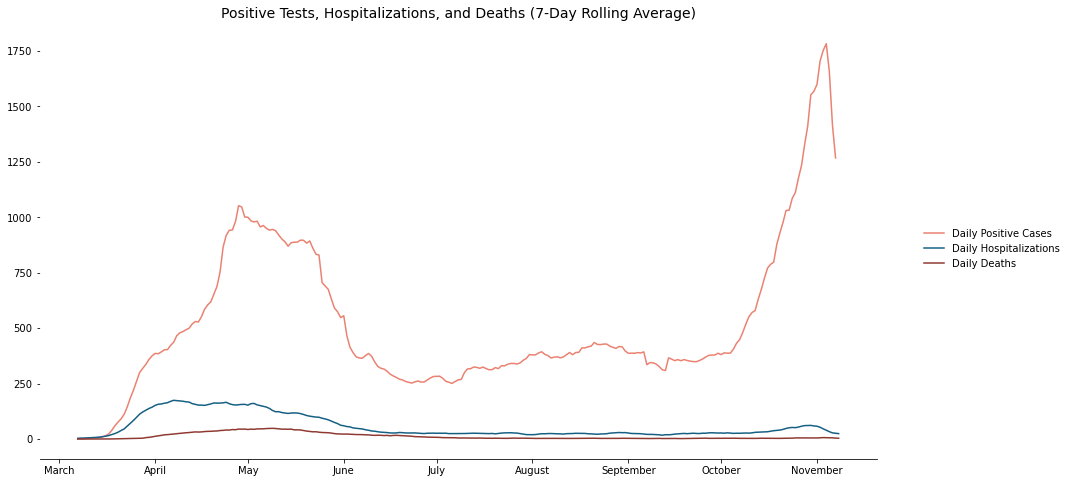

In [47]:
title = 'Positive Tests, Hospitalizations, and Deaths (7-Day Rolling Average)'
var_labels = ['Daily Positive Cases', 'Daily Hospitalizations', 'Daily Deaths']

fig, ax = plt.subplots(figsize=(15,8))
fig.patch.set_facecolor('white')

colors =["#ea8171","#155F83", "#8F3931", "#8A9045", "#D5802B", "#350E20", "#58593F", "#880d1e", '#c8674c',
        '#a2755e']

x = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

cases = ax.plot(testing['Positive Tests'].rolling(7).mean(), color = colors[0])
hospitalizations = ax.plot(df['Hospitalizations - Total'].rolling(7).mean(), color = colors[1])
deaths = ax.plot(df['Deaths - Total'].rolling(7).mean(), color = colors[2])
var_handles = [cases, hospitalizations, deaths]

spine_position = ['top', 'left', 'right']
for spine in spine_position:    
    ax.spines[spine].set_color('white')

ax.set_title(title, fontsize=14)
ax.set_xticklabels(x)

ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(0.93, .35, 0.3, 0.2), loc='upper right', frameon=False)
plt.show()


In [48]:
def make_line_plot(dataframe, vars_list, var_labels, title, dist):
    fig, ax = plt.subplots(figsize=(15,8))
    fig.patch.set_facecolor('white')

    colors =["#ea8171","#155F83", "#8F3931", "#8A9045", "#D5802B", "#350E20", "#58593F", "#880d1e", '#c8674c',
            '#a2755e']

    x = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
    
    var_handles = []
    for i in range(len(vars_list)):
        var_handles.append(ax.plot(dataframe[vars_list[i]].rolling(7).mean(), color = colors[i]))

    spine_position = ['top', 'left', 'right']
    for spine in spine_position:    
        ax.spines[spine].set_color('white')

    ax.set_title(title, fontsize=14)
    ax.set_xticklabels(x)

    ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)
    plt.show()


While cases spiked in the month of October, deaths and hospitalizations remained relatively low in Chicago. This could imply that hospitals are more equipped to handle the virus than previously.

## Daily Cases
Using positive tests for this metric as it seems to better reflect the trend the city is experiencing. Case count in df seems to underestimate the number of cases each day.

<ipython-input-48-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


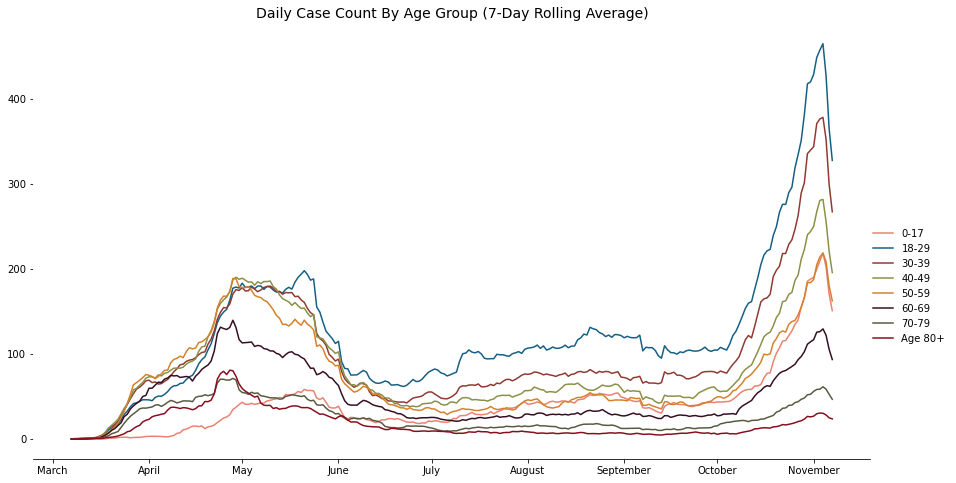

In [49]:
# Plotting cases by age group
make_line_plot(vars_list = list(testing.columns[22:30]),
    dataframe = testing,
    title = 'Daily Case Count By Age Group (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+'])

In the chart above, we can see that all throughout the summer and fall, individuals netween the ages of 18 and 29 have led the city in positive cases. This is likely the result of individuals in this age group being both more risky, but also more likely to be tested than older individuals.

<ipython-input-48-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


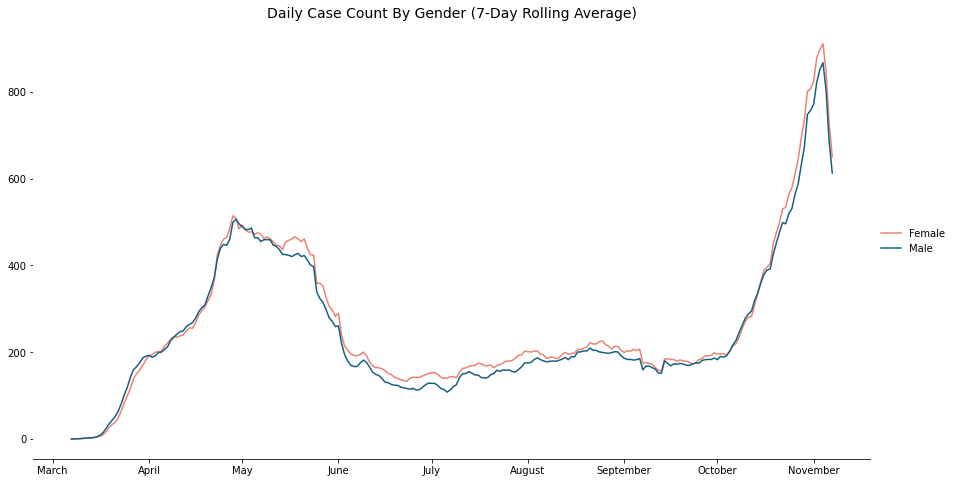

In [50]:
# Plotting cases by gender
make_line_plot(vars_list = list(testing.columns[31:33]),
    dataframe = testing,
    title = 'Daily Case Count By Gender (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Female', 'Male'])


Males and females test positivie for the virus at similar rates.

<ipython-input-48-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


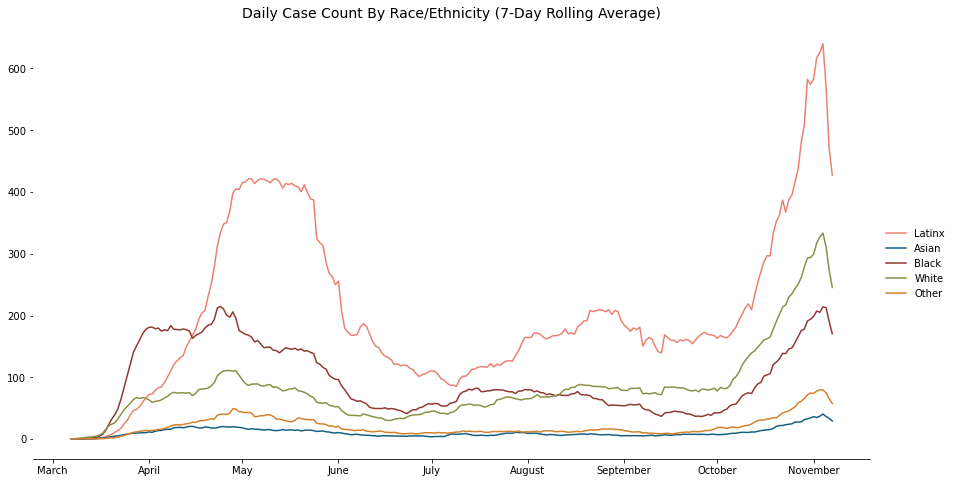

In [51]:
# Plotting cases by race/ethnicity
make_line_plot(vars_list = list(testing.columns[34:39]),
    dataframe = testing,
    title = 'Daily Case Count By Race/Ethnicity (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other'])

Latinx individuals lead others in Covid-19 positivity.

## Daily Testing

In [460]:
testing.head(3)

,Day,Positive Tests,Not Positive Tests,Total Tests,Tests - Age 0-17,Tests - Age 18-29,Tests - Age 30-39,Tests - Age 40-49,Tests - Age 50-59,Tests - Age 60-69,Tests - Age 70-79,Tests - Age 80+,Tests - Age Unknown,Tests - Female,Tests - Male,Tests - Gender Unknown,Tests - Latinx,Tests - Asian Non-Latinx,Tests - Black Non-Latinx,Tests - White Non-Latinx,Tests - Other Race Non-Latinx,Tests - Unknown Race/Ethnicity,Positive Tests - Age 0-17,Positive Tests - Age 18-29,Positive Tests - Age 30-39,Positive Tests - Age 40-49,Positive Tests - Age 50-59,Positive Tests - Age 60-69,Positive Tests - Age 70-79,Positive Tests - Age 80+,Positive Tests - Age Unknown,Positive Tests - Female,Positive Tests - Male,Positive Tests - Unknown Gender,Positive Tests - Latinx,Positive Tests - Asian Non-Latinx,Positive Tests - Black Non-Latinx,Positive Tests - White Non-Latinx,Positive Tests - Other Race Non-Latinx,Positive Tests - Unknown Race/Ethnicity,Not-Positive Tests - Age 0-17,Not-Positive Tests - Age 18-29,Not-Positive Tests - Age 30-39,Not-Positive Tests - Age 40-49,Not-Positive Tests - Age 50-59,Not-Positive Tests - Age 60-69,Not-Positive Tests - Age 70-79,Not-Positive Tests - Age 80+,Not-Positive Tests - Age Unknown,Not-Positive Tests - Female,...,70-79_cum_cases,Age 80+_cum_cases,Latinx_cum_cases,Asian_cum_cases,Black_cum_cases,White_cum_cases,Other_cum_cases,0-17_posRate,18-29_posRate,30-39_posRate,40-49_posRate,50-59_posRate,60-69_posRate,70-79_posRate,Age 80+_posRate,Latinx_posRate,Asian_posRate,Black_posRate,White_posRate,Other_posRate,holiday_5,holiday_7,holiday_10,holiday_14,holiday_15,restrictions,PRCP,TAVG,TAVG_5,TAVG_7,TAVG_10,TAVG_14,TAVG_15,PRCP_5,PRCP_7,PRCP_10,PRCP_14,PRCP_15,tight_res,loose_res,tight_res_5,tight_res_7,tight_res_10,tight_res_14,tight_res_15,loose_res_5,loose_res_7,loose_res_10,loose_res_14,loose_res_15
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,Sunday,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0,41.0,38.0,43.0,19.0,30.0,18.0,0.06,0.00,0.0,0.00,0.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-02,Monday,0,5,5,0,1,0,2,2,0,0,0,0,3,2,0,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,0,0,0,0,3,...,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0,46.0,31.0,41.0,21.0,35.0,30.0,0.10,0.00,0.0,0.13,0.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-03,Tuesday,0,9,9,3,3,1,0,0,1,1,0,0,4,5,0,2,2,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,1,0,0,1,1,0,0,4,...,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0,38.0,27.0,38.0,36.0,37.0,35.0,0.00,0.06,0.0,0.00,0.13,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<ipython-input-48-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


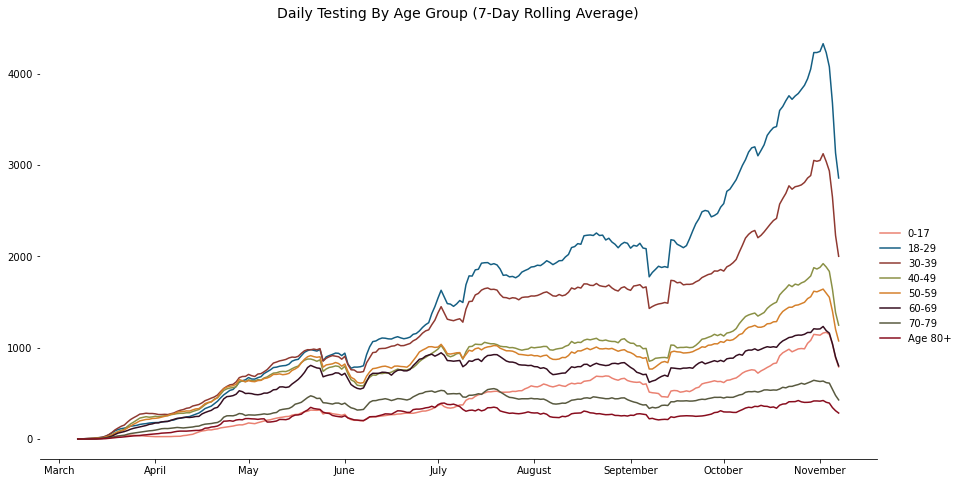

In [461]:
# Plotting testing by age group
make_line_plot(vars_list = list(testing.columns[4:12]),
    dataframe = testing,
    title = 'Daily Testing By Age Group (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+'])

<ipython-input-48-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


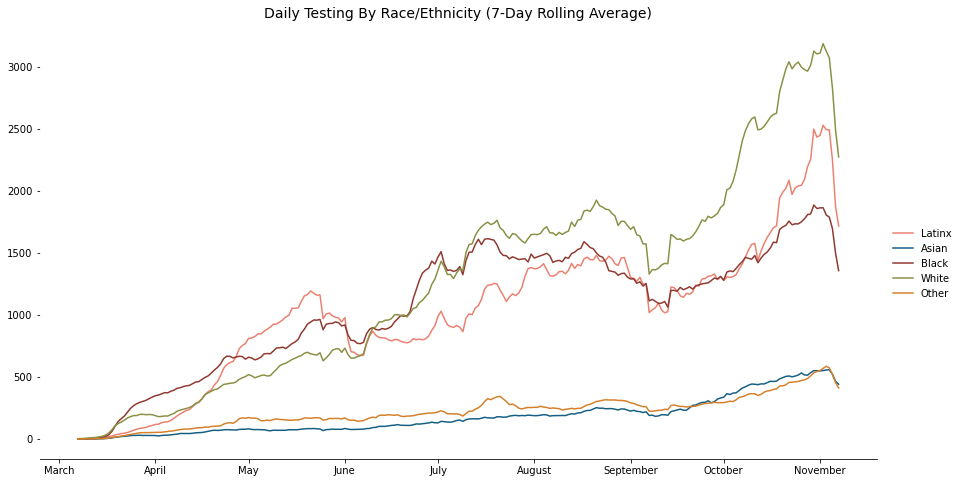

In [462]:
# Plotting testing by race/ethnicity
make_line_plot(vars_list = list(testing.columns[16:21]),
    dataframe = testing,
    title = 'Daily Testing By Race/Ethnicity (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other'])

## Daily Deaths from Covid-19

<ipython-input-48-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


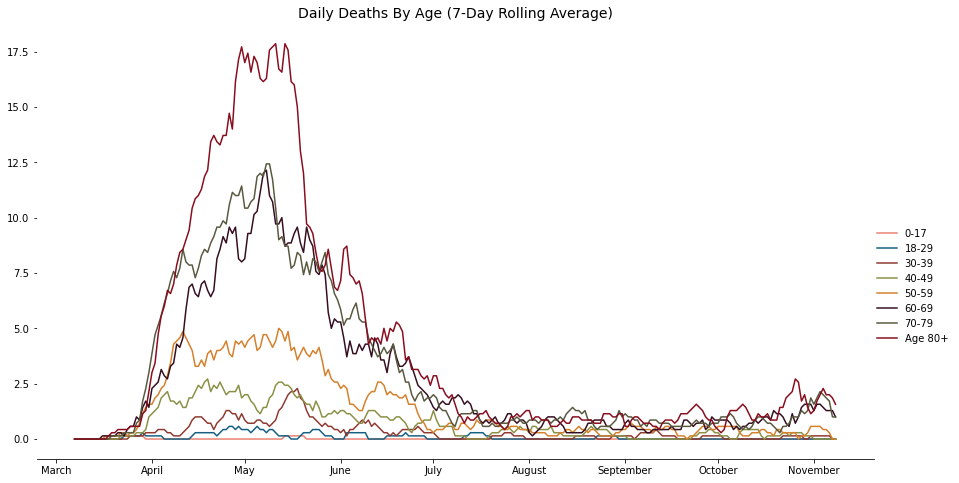

In [52]:
# Plotting cases by Age
make_line_plot(vars_list = list(df.columns[21:29]),
    dataframe = df,
    title = 'Daily Deaths By Age (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+'])

Individuals above 80 continue to be most affected by the virus, followed by individuals in their 60s and 40s.

<ipython-input-48-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


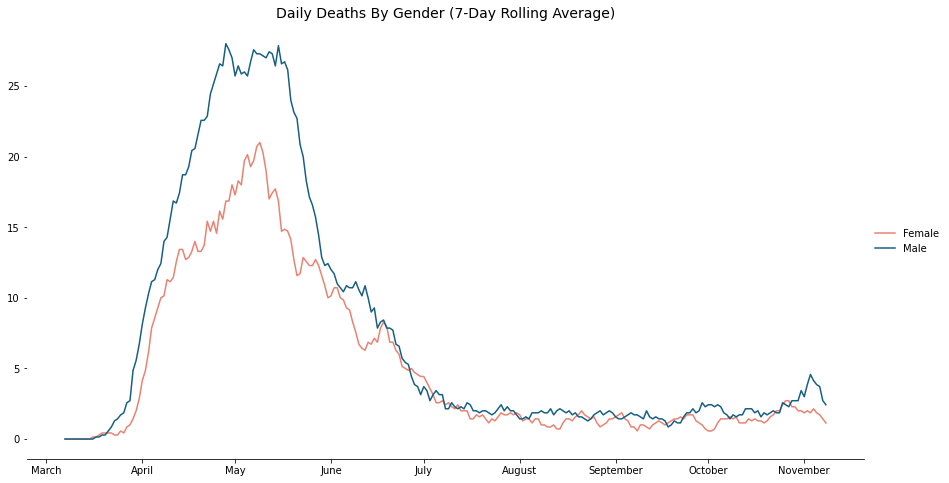

In [53]:
# Plotting deaths by gender
make_line_plot(vars_list = list(df.columns[30:32]),
    dataframe = df,
    title = 'Daily Deaths By Gender (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Female', 'Male'])

Consistently, mem seem to die more, on average, than women.

<ipython-input-48-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


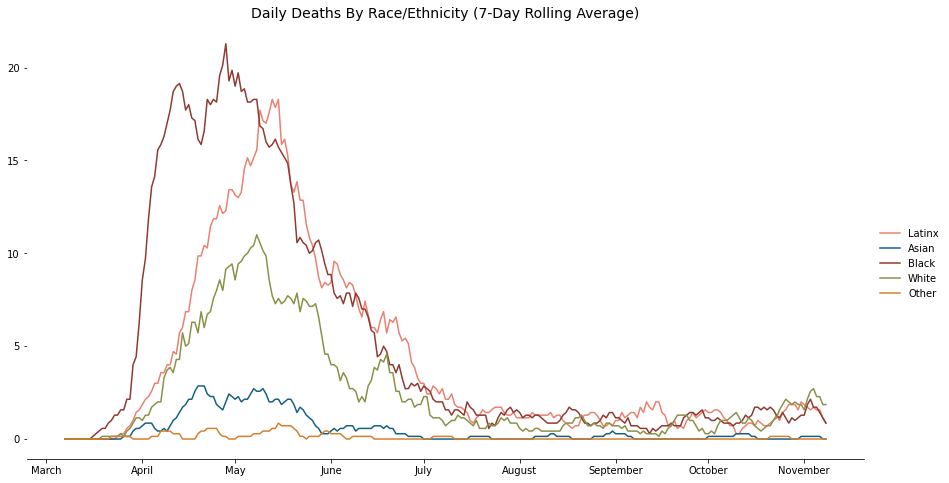

In [54]:
# Plotting deaths by race/ethnicity
make_line_plot(vars_list = list(df.columns[33:38]),
    dataframe = df,
    title = 'Daily Deaths By Race/Ethnicity (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other'])

Daily deaths in the city remain relatively low with only a slight uptick in deaths among Black and White people near the start of November.

## Daily Hospitalizations from Covid-19

<ipython-input-48-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


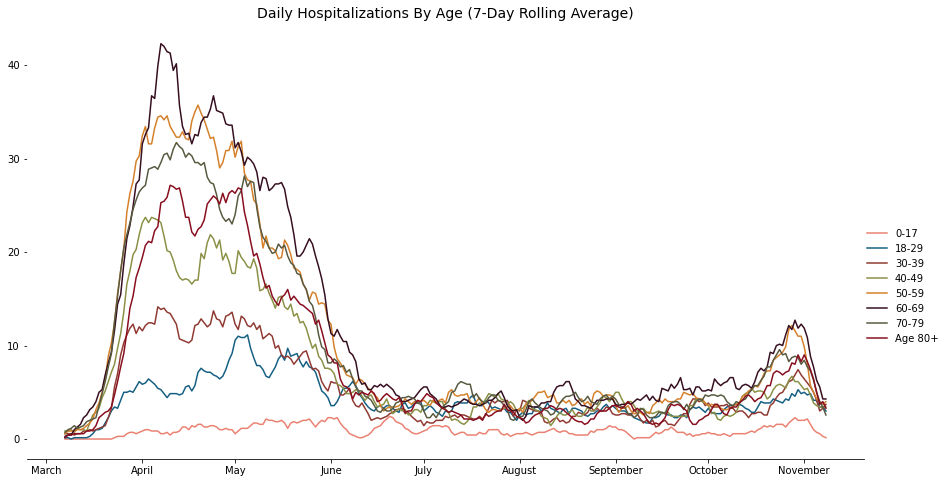

In [55]:
# Plotting cases by Age
make_line_plot(vars_list = list(df.columns[39:47]),
    dataframe = df,
    title = 'Daily Hospitalizations By Age (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+'])

<ipython-input-48-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


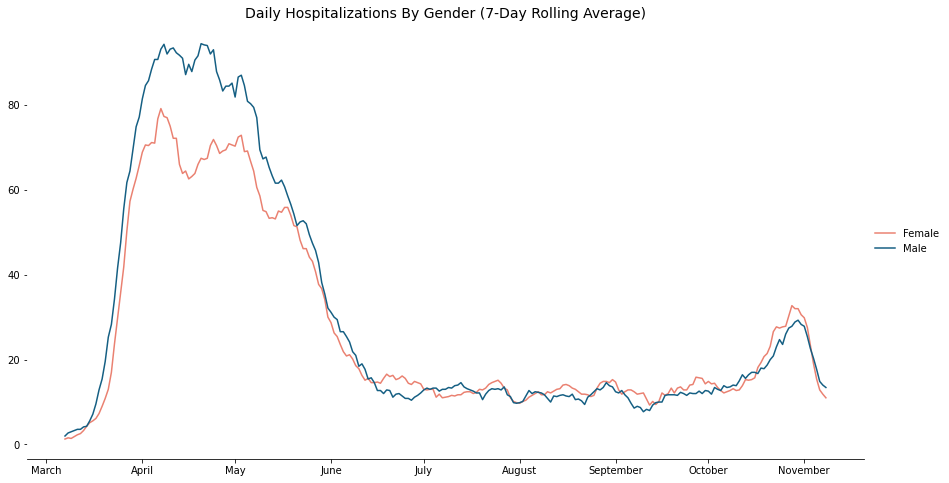

In [56]:
# Plotting hospitalizations by gender
make_line_plot(vars_list = list(df.columns[48:50]),
    dataframe = df,
    title = 'Daily Hospitalizations By Gender (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Female', 'Male'])

<ipython-input-48-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


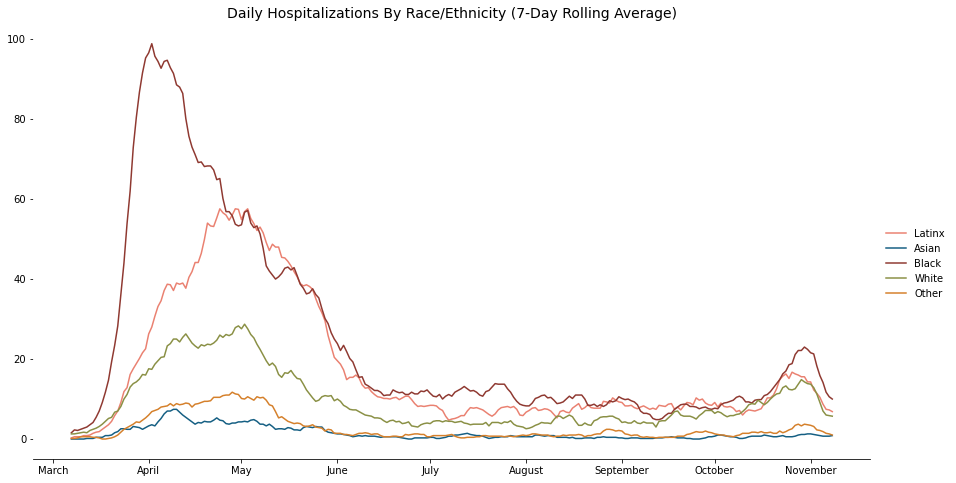

In [57]:
# Plotting hospitalizations by race/ethnicity
make_line_plot(vars_list = list(df.columns[51:-1]),
    dataframe = df,
    title = 'Daily Hospitalizations By Race/Ethnicity (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other'])

# Cumulative Case Count

In [58]:
# Making cumulative case count for total
def cum_count(series):
    output = []
    for i in range(len(series)):
        if i == 0:
            output.append(series[0])
        else:
            output.append(series[i]+output[i-1])
    return output

testing['cum_cases'] = cum_count(testing['Positive Tests'])

<ipython-input-58-6ba74736518b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['cum_cases'] = cum_count(testing['Positive Tests'])


In [59]:
# Making cumulative case counts by age
var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+']
var_loc = np.arange(22,30,1)
for i in range(len(var_loc)):
    testing['{}_cum_cases'.format(var_labels[i])] = cum_count(testing.iloc[:,var_loc[i]])

<ipython-input-59-e7db9106087e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['{}_cum_cases'.format(var_labels[i])] = cum_count(testing.iloc[:,var_loc[i]])


In [60]:
# Making cumulative case counts by race
var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other']
var_loc = np.arange(34,39,1)
for i in range(len(var_loc)):
    testing['{}_cum_cases'.format(var_labels[i])] = cum_count(testing.iloc[:,var_loc[i]])

<ipython-input-60-438022b05477>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['{}_cum_cases'.format(var_labels[i])] = cum_count(testing.iloc[:,var_loc[i]])


<ipython-input-48-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


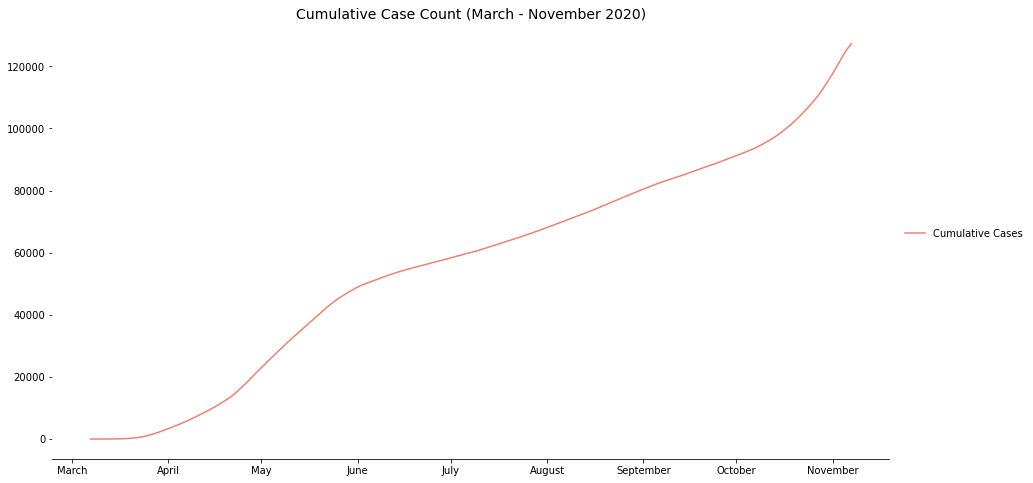

In [61]:
# plotting cumulative cases overall
make_line_plot(vars_list = ['cum_cases'],
    dataframe = testing,
    title = 'Cumulative Case Count (March - November 2020)',
    dist = .87,
    var_labels = ['Cumulative Cases'])

<ipython-input-48-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


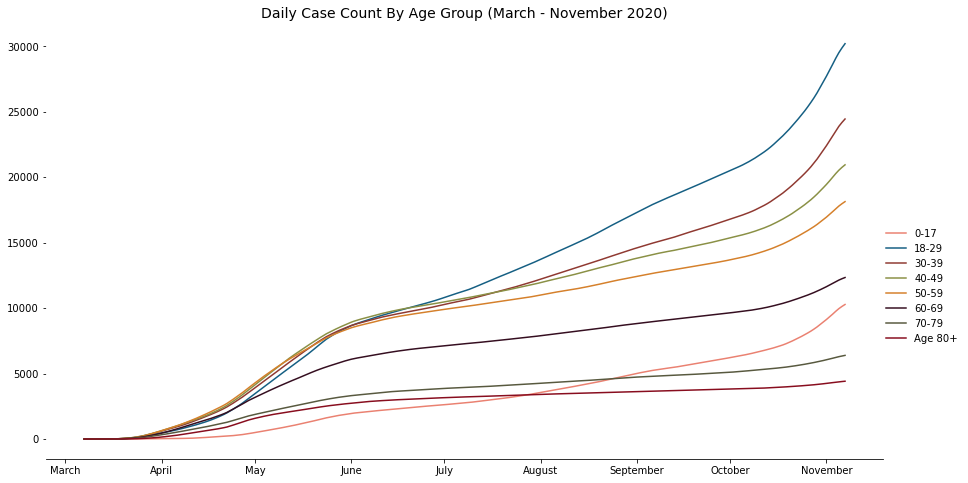

In [63]:
# Plotting cumulative cases by age
make_line_plot(vars_list = list(testing.columns[-13:-5]),
    dataframe = testing,
    title = 'Daily Case Count By Age Group (March - November 2020)',
    dist = .8,
    var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+'])

<ipython-input-335-23efa025720f>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


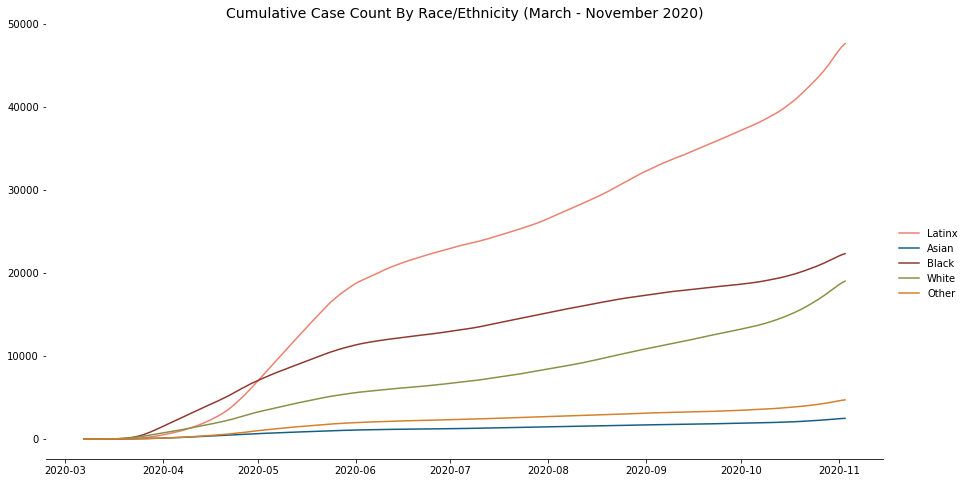

In [383]:
# Plotting cumulative cases by race/ethnicity
make_line_plot(vars_list = list(testing.columns[-5:]),
    dataframe = testing,
    title = 'Cumulative Case Count By Race/Ethnicity (March - November 2020)',
    dist = .8,
    var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other'])

## Positivity Rates

In [65]:
# Making positivity rate columns by age
var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+']
var_loc1 = np.arange(22,30,1) # positive cases by age group
var_loc2 = np.arange(4,12,1) # total tests administered by age group
for i in range(len(var_loc1)):
    testing['{}_posRate'.format(var_labels[i])] = round((testing.iloc[:,var_loc1[i]] / testing.iloc[:,var_loc2[i]])*100, 2)

<ipython-input-65-8a39d67ff199>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['{}_posRate'.format(var_labels[i])] = round((testing.iloc[:,var_loc1[i]] / testing.iloc[:,var_loc2[i]])*100, 2)


In [66]:
# Making positivity rate columns by race
var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other']
var_loc1 = np.arange(34,39,1) # positive cases by race
var_loc2 = np.arange(16,21,1) # total tests administered by race
for i in range(len(var_loc1)):
    testing['{}_posRate'.format(var_labels[i])] = round((testing.iloc[:,var_loc1[i]] / testing.iloc[:,var_loc2[i]])*100, 2)

<ipython-input-66-5c05e4636df7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['{}_posRate'.format(var_labels[i])] = round((testing.iloc[:,var_loc1[i]] / testing.iloc[:,var_loc2[i]])*100, 2)


In [67]:
# Replacing null values with 0 since they are a result of dividing 
testing.iloc[:,-13:] = testing.iloc[:,-13:].replace(np.nan, 0.00)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<ipython-input-48-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


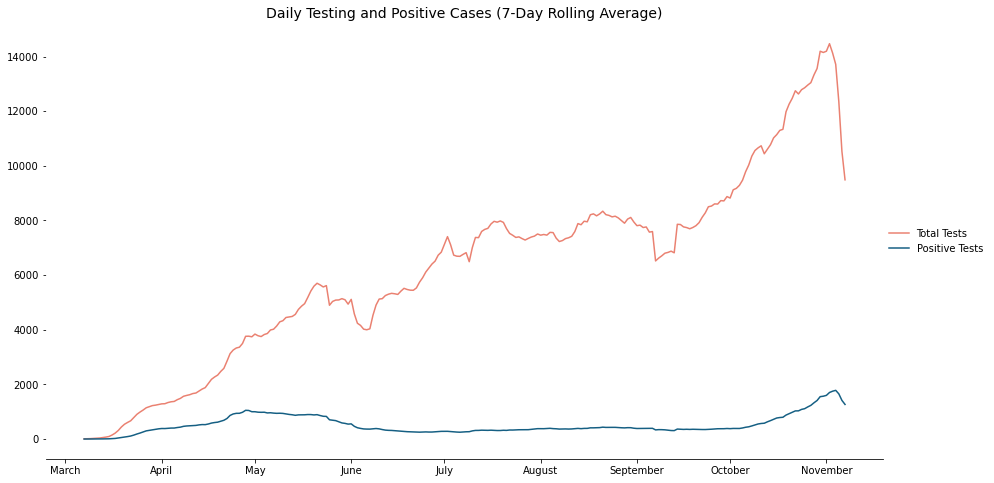

In [451]:
# Plotting positivity rate
make_line_plot(vars_list = ['Total Tests', 'Positive Tests'],
    dataframe = testing,
    title = 'Daily Testing and Positive Cases (7-Day Rolling Average)',
    dist = .83,
    var_labels = ['Total Tests','Positive Tests'])

<ipython-input-459-8a00fb992a30>:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(0.85, .35, 0.3, 0.2), loc='upper right', frameon=False)


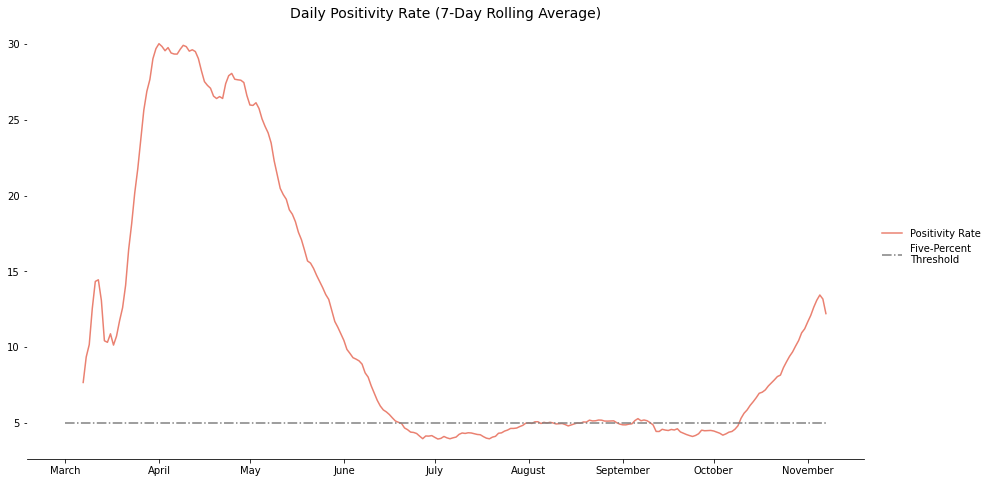

In [459]:
title = 'Daily Positivity Rate (7-Day Rolling Average)'
var_labels = ['Positivity Rate', 'Five-Percent\nThreshold']

fig, ax = plt.subplots(figsize=(15,8))
fig.patch.set_facecolor('white')

colors =["#ea8171","#155F83", "#8F3931", "#8A9045", "#D5802B", "#350E20", "#58593F", "#880d1e", '#c8674c',
        '#a2755e']

x = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

pos_rate = ax.plot(testing.posRate.rolling(7).mean(), color = colors[0])
threshold = ax.plot(pd.Series(5, index=testing.posRate.index), color = 'grey', linestyle='-.')
var_handles = [pos_rate, threshold]

spine_position = ['top', 'left', 'right']
for spine in spine_position:    
    ax.spines[spine].set_color('white')

ax.set_title(title, fontsize=14)
ax.set_xticklabels(x)

ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(0.85, .35, 0.3, 0.2), loc='upper right', frameon=False)
plt.show()

The above should be interpreted cautiously. At the start of the pandemic, testing was not widely available and, as such, there were more positive cases as a percentage of tests administered. As testing expanded, there were more cases, especialy in October, but testing was widely available creating the illusion that positivity rates are not large. However, even with expanded testing, it should be noted that a positivity rate above 5 percent could indicate that testing may not be readily available (this was certainly the case in March - May) or that the percentage of residents testing positive is fairly high. In this case, the new October spike is significantly higher than 5 percent implying that most of Chicago residents who are being tested are positive and measures must be taken to mitigate the spread of the virus. On October 23, Chicago implemented a 9 pm curfew for bars and restaurants and limited indoor dining substantially. 

In [70]:
testing.head()

,Day,Positive Tests,Not Positive Tests,Total Tests,Tests - Age 0-17,Tests - Age 18-29,Tests - Age 30-39,Tests - Age 40-49,Tests - Age 50-59,Tests - Age 60-69,Tests - Age 70-79,Tests - Age 80+,Tests - Age Unknown,Tests - Female,Tests - Male,Tests - Gender Unknown,Tests - Latinx,Tests - Asian Non-Latinx,Tests - Black Non-Latinx,Tests - White Non-Latinx,Tests - Other Race Non-Latinx,Tests - Unknown Race/Ethnicity,Positive Tests - Age 0-17,Positive Tests - Age 18-29,Positive Tests - Age 30-39,Positive Tests - Age 40-49,Positive Tests - Age 50-59,Positive Tests - Age 60-69,Positive Tests - Age 70-79,Positive Tests - Age 80+,Positive Tests - Age Unknown,Positive Tests - Female,Positive Tests - Male,Positive Tests - Unknown Gender,Positive Tests - Latinx,Positive Tests - Asian Non-Latinx,Positive Tests - Black Non-Latinx,Positive Tests - White Non-Latinx,Positive Tests - Other Race Non-Latinx,Positive Tests - Unknown Race/Ethnicity,Not-Positive Tests - Age 0-17,Not-Positive Tests - Age 18-29,Not-Positive Tests - Age 30-39,Not-Positive Tests - Age 40-49,Not-Positive Tests - Age 50-59,Not-Positive Tests - Age 60-69,Not-Positive Tests - Age 70-79,Not-Positive Tests - Age 80+,Not-Positive Tests - Age Unknown,Not-Positive Tests - Female,Not-Positive Tests - Male,Not-Positive Tests - Gender Unknown,Not-Positive Tests - Latinx,Not-Positive Tests - Asian Non-Latinx,Not-Positive Tests - Black Non-Latinx,Not-Positive Tests - White Non-Latinx,Not-Positive Tests - Other Race Non-Latinx,Not-Positive Tests - Unknown Race/Ethnicity,posRate,cum_cases,0-17_cum_cases,18-29_cum_cases,30-39_cum_cases,40-49_cum_cases,50-59_cum_cases,60-69_cum_cases,70-79_cum_cases,Age 80+_cum_cases,Latinx_cum_cases,Asian_cum_cases,Black_cum_cases,White_cum_cases,Other_cum_cases,0-17_posRate,18-29_posRate,30-39_posRate,40-49_posRate,50-59_posRate,60-69_posRate,70-79_posRate,Age 80+_posRate,Latinx_posRate,Asian_posRate,Black_posRate,White_posRate,Other_posRate
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,Sunday,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2020-03-02,Monday,0,5,5,0,1,0,2,2,0,0,0,0,3,2,0,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,0,0,0,0,3,2,0,2,1,0,2,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2020-03-03,Tuesday,0,9,9,3,3,1,0,0,1,1,0,0,4,5,0,2,2,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,1,0,0,1,1,0,0,4,5,0,2,2,1,3,0,1,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2020-03-04,Wednesday,0,11,11,0,1,4,0,4,0,2,0,0,5,6,0,0,1,1,3,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,4,0,2,0,0,5,6,0,0,1,1,3,1,5,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2020-03-05,Thursday,1,12,13,0,2,0,3,4,2,1,1,0,3,10,0,2,0,3,2,0,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0,3,3,2,1,1,0,2,10,0,2,0,2,2,0,6,7.69,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,0.0


<ipython-input-48-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


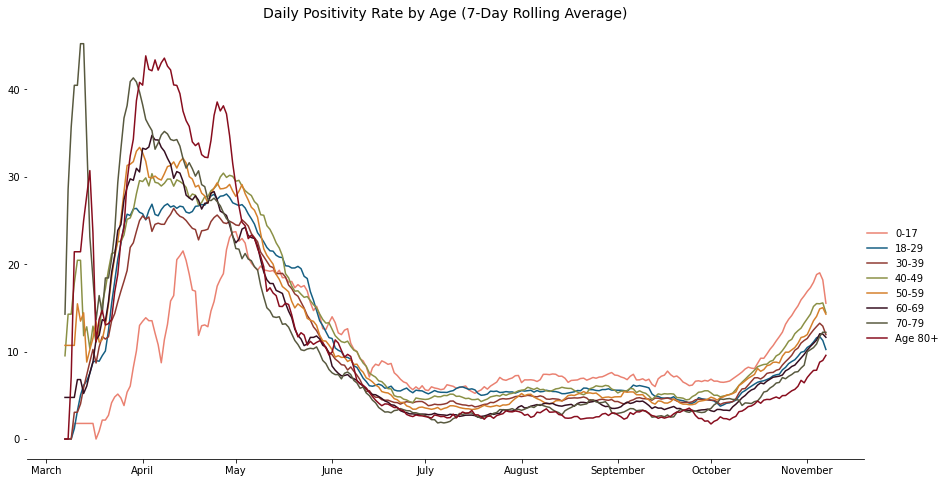

In [69]:
# Plotting positivity rate by age
make_line_plot(vars_list = list(testing.columns[-13:-5]),
    dataframe = testing,
    title = 'Daily Positivity Rate by Age (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+'])

<ipython-input-48-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


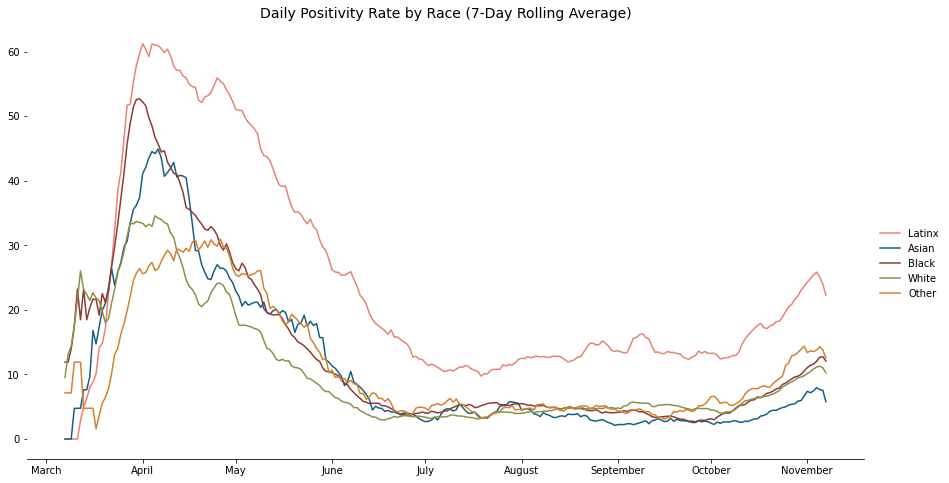

In [71]:
# Plotting positivity rate by race
make_line_plot(vars_list = list(testing.columns[-5:]),
    dataframe = testing,
    title = 'Daily Positivity Rate by Race (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other'])

## Time-Series Modeling

For the time series analysis, I'll be modeling positivity rates given their importance in policy-making. 

In [72]:
# Defining metrics 
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [77]:
def non_sarima_plots(vars_list, var_labels, title, dist):
    fig, ax = plt.subplots(figsize=(15,8))
    fig.patch.set_facecolor('white')

    colors =["#ea8171","#155F83", "#8F3931", "#8A9045", "#D5802B", "#350E20", "#58593F", "#880d1e", '#c8674c',
            '#a2755e']

    var_handles = []
    for i in range(len(vars_list)):
        var_handles.append(ax.plot(vars_list[i], color = colors[i]))

    spine_position = ['top', 'left', 'right']
    for spine in spine_position:    
        ax.spines[spine].set_color('white')

    ax.set_title(title, fontsize=14)

    ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)
    plt.show()

In [73]:
# Creating function to plot actual vs predicted
def forecast_plot(vars_list, var_labels, title, dist, min):
    fig, ax = plt.subplots(figsize=(15,8))
    fig.patch.set_facecolor('white')

    colors =["#ea8171","#155F83", "#8F3931", "#8A9045", "#D5802B", "#350E20", "#58593F", "#880d1e", '#c8674c',
            '#a2755e']

    var_handles = []
    for i in range(len(vars_list)):
        var_handles.append(ax.plot(vars_list[i], color = colors[i]))

    ax.fill_between(lower_series.index, 
                 min, 
                 upper_series, 
                 color='k', alpha=.05)

    spine_position = ['top', 'left', 'right']
    for spine in spine_position:    
        ax.spines[spine].set_color('white')

    ax.set_title(title, fontsize=14)

    ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)
    plt.show()

## Naive Model

In [81]:
# Creating testing and training sets
train = testing.loc[:'2020-10-25', 'posRate']
test = testing.loc['2020-10-25':, 'posRate']

In [82]:
naive = pd.Series([train[len(train)-1] for i in range(len(test))])
naive.index = test.index

<ipython-input-77-eb2cab746153>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


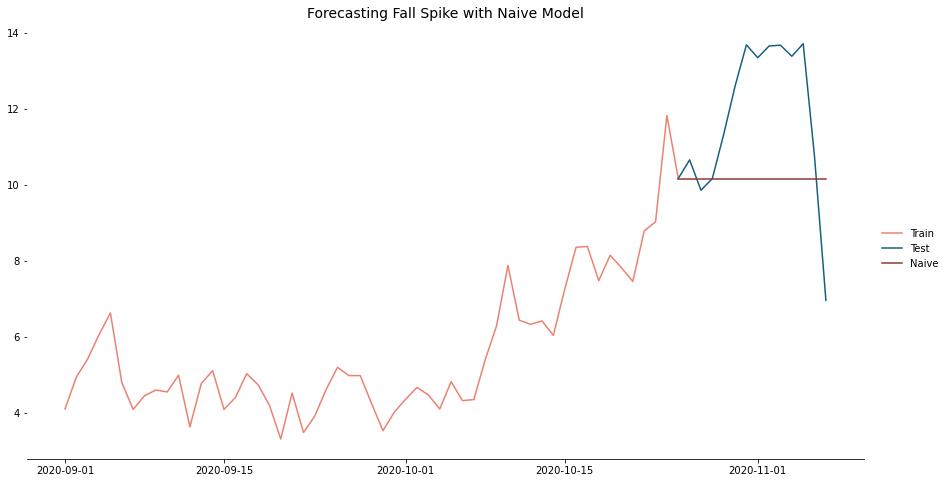

In [83]:
non_sarima_plots(vars_list =[train['2020-09-01':], test, naive],
                          var_labels = ['Train', 'Test','Naive'],
                          title = 'Forecasting Fall Spike with Naive Model',
                          dist=.8)

In [84]:
naive_metrics = forecast_accuracy(naive, test)

/usr/local/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [85]:
naive_metrics

{'mape': 0.170967435643109,
 'me': -1.5428571428571427,
 'mae': 2.045714285714286,
 'mpe': -0.10058928438260477,
 'rmse': 2.509832094554762,
 'acf1': 0.5109099685068471,
 'corr': nan,
 'minmax': 0.16050093340799676}

## Moving Average Model

In [86]:
moving_avg = pd.Series(train.rolling(7).mean()[-1] for i in range(len(test)))
moving_avg.index = test.index

<ipython-input-77-eb2cab746153>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


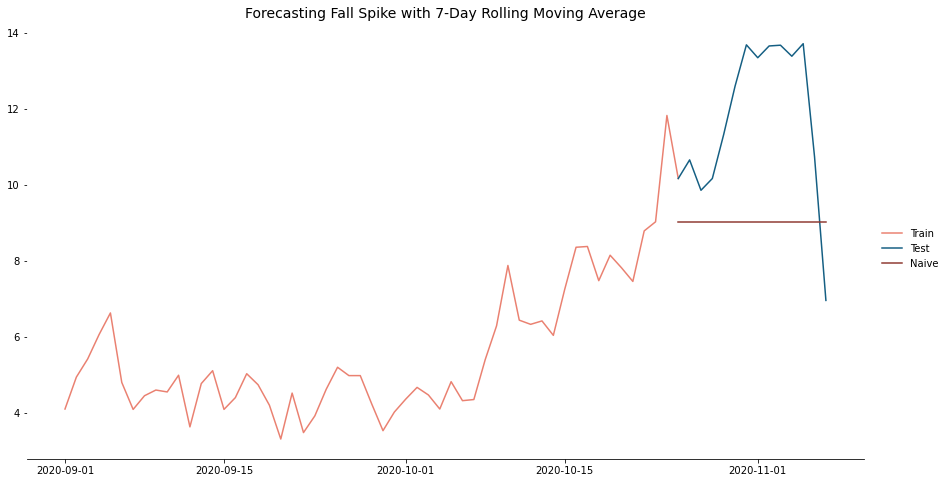

In [88]:
non_sarima_plots(vars_list =[train['2020-09-01':], test, moving_avg],
                          var_labels = ['Train', 'Test','Naive'],
                          title = 'Forecasting Fall Spike with 7-Day Rolling Moving Average',
                          dist=.8)

In [89]:
moving_metrics = forecast_accuracy(moving_avg, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [90]:
moving_metrics

{'mape': 0.24350779978587525,
 'me': -2.6771428571428686,
 'mae': 2.9736734693877653,
 'mpe': -0.20090282676218324,
 'rmse': 3.329555954949987,
 'acf1': 0.5109099685068471,
 'corr': 8.011852146648298e-16,
 'minmax': 0.2386141218567508}

## Triple Exponential Smoothing Model

In [91]:
# double or triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# create class
smoothing_model = ExponentialSmoothing(train, trend='add', damped=True, seasonal='add',
                                       seasonal_periods = 7).fit(optimized=True)
# make prediction
smoothed = smoothing_model.forecast(len(test))

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<ipython-input-77-eb2cab746153>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


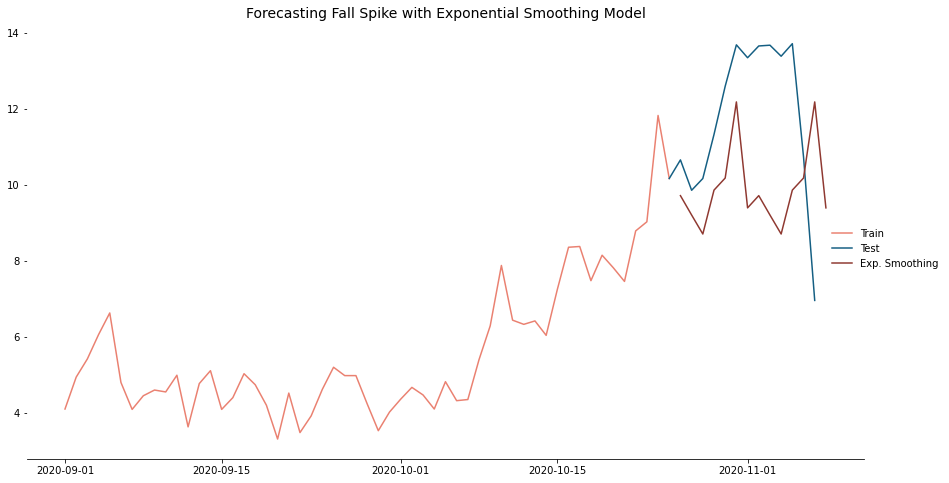

In [92]:
non_sarima_plots(vars_list =[train['2020-09-01':], test, smoothed],
                          var_labels = ['Train', 'Test','Exp. Smoothing'],
                          title = 'Forecasting Fall Spike with Exponential Smoothing Model',
                          dist=.8)

In [93]:
smoothing_metrics = forecast_accuracy(smoothed, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [94]:
smoothing_metrics

{'mape': 0.23646825057484758,
 'me': -1.8979630082294474,
 'mae': 2.7020920579030516,
 'mpe': -0.1209324675757665,
 'rmse': 3.15331282701038,
 'acf1': nan,
 'corr': 0.03080201991566493,
 'minmax': 0.18824757398258019}

## SARIMA Model

In [96]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel_1 = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_d = 3, max_q=3, m=7,
                         max_P=3, max_D=3, max_Q=3,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_1.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=1068.773, Time=0.25 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1297.409, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1075.520, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=1160.042, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1295.435, Time=0.01 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=1102.595, Time=0.06 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=1077.371, Time=0.12 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=1067.674, Time=0.18 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=1100.710, Time=0.03 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=1071.635, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  239
Model:             SARIMAX(3, 0, 0)x(0, 1, [1], 7)   Log Likelihood                -515.074
Date:                             Sun, 08 Nov 2020   AIC                           1040.148
Time:                                     22:46:47   BIC                           1057.382
Sample:                                          0   HQIC                          1047.098
                                             - 239                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9280      0.042     22.298      0.000       0.846       1.010
ar.L2         -0.2910      0.057     -5.090      0.000      -0.403      -0.179
ar.L3          0.3480      0.033     10.442      0.000       0.283       0.413
ma.S.L7       -0.8642      0.071    -12.162      0.000      -1.003      -0.725
sigma2         4.7600      0.317     15.018      0.000       4.139       5.381
===================================================================================
Ljung-Box (Q):                      143.82   Jarque-Bera (JB):               868.99
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
# Forecast
n_periods = len(test)
fc, confint = smodel_1.predict(n_periods=n_periods, return_conf_int=True)
index = test.index
# index = pd.date_range(test.index[-1], periods = n_periods, freq='D')

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


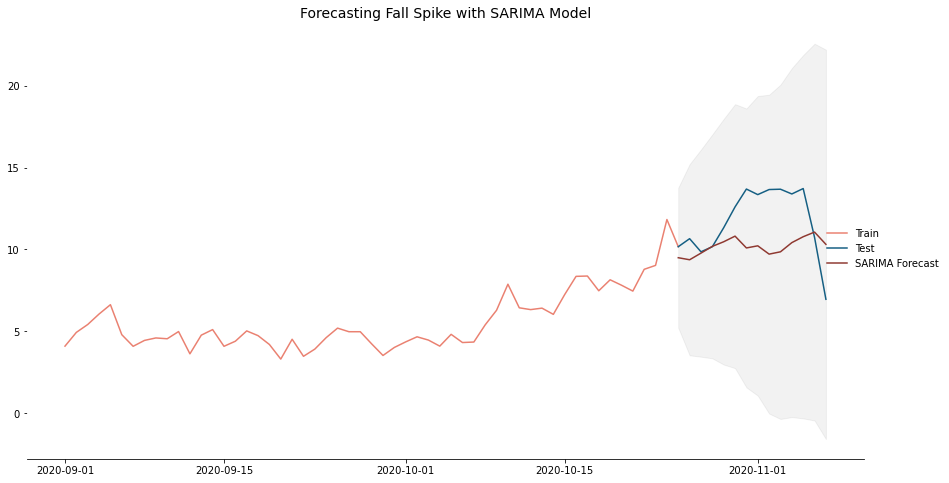

In [98]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMA Forecast'],
                          title = 'Forecasting Fall Spike with SARIMA Model',
                          dist=.8,
                          min=lower_series)

In [99]:
SARIMA_metrics = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [100]:
SARIMA_metrics

{'mape': 0.17338773313191277,
 'me': -1.527512606651019,
 'mae': 2.0556020619630972,
 'mpe': -0.09997649035982416,
 'rmse': 2.5030126544007,
 'acf1': 0.5207068277396347,
 'corr': 0.11601131398741168,
 'minmax': 0.1621348492263106}

## SARIMAX Model
Adding in variables for:
- Holidays
- Recovery Phases
- Temperature

In [101]:
testing.reset_index(inplace=True)

In [102]:
testing.Date = testing.Date.astype(str)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [103]:
# Creating column for 5-day lag after holiday
conditions = [
    testing.Date=='2020-05-25',
    testing.Date=='2020-07-09',
    testing.Date=='2020-09-12',
    testing.Date=='2020-11-03'
]

choices = [
    1,
    1,
    1,
    1
]

testing['holiday_5'] = np.select(conditions, choices, default=0)

<ipython-input-103-f8f4129b44b6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['holiday_5'] = np.select(conditions, choices, default=0)


In [104]:
# Creating column for 7-day lag after holiday
conditions = [
    testing.Date=='2020-05-27',
    testing.Date=='2020-07-11',
    testing.Date=='2020-09-14',
    testing.Date=='2020-11-05'
]

choices = [
    1,
    1,
    1,
    1
]

testing['holiday_7'] = np.select(conditions, choices, default=0)

<ipython-input-104-695388f5c4b9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['holiday_7'] = np.select(conditions, choices, default=0)


In [105]:
# Creating column for 10-day lag after holiday
conditions = [
    testing.Date=='2020-05-30',
    testing.Date=='2020-07-14',
    testing.Date=='2020-09-17',
    testing.Date=='2020-11-08'
]

choices = [
    1,
    1,
    1,
    1
]

testing['holiday_10'] = np.select(conditions, choices, default=0)

<ipython-input-105-5c50397ef843>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['holiday_10'] = np.select(conditions, choices, default=0)


In [106]:
# Creating column for 14-day lag after holiday
conditions = [
    testing.Date=='2020-06-03',
    testing.Date=='2020-07-18',
    testing.Date=='2020-09-21',
    testing.Date=='2020-11-12'
]

choices = [
    1,
    1,
    1,
    1
]

testing['holiday_14'] = np.select(conditions, choices, default=0)

<ipython-input-106-f22760e073e9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['holiday_14'] = np.select(conditions, choices, default=0)


In [107]:
# Creating column for 15-day lag after holiday
conditions = [
    testing.Date=='2020-06-04',
    testing.Date=='2020-07-19',
    testing.Date=='2020-09-22',
    testing.Date=='2020-11-13'
]

choices = [
    1,
    1,
    1,
    1
]

testing['holiday_15'] = np.select(conditions, choices, default=0)

<ipython-input-107-6a0b86e43096>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['holiday_15'] = np.select(conditions, choices, default=0)


In [108]:
# Creating  recovery phases feature
conditions = [
    (testing.Date>='2020-03-16')&(testing.Date<='2020-04-30'),
    (testing.Date>='2020-05-01')&(testing.Date<='2020-06-04'),
    (testing.Date>='2020-06-05')&(testing.Date<='2020-06-25'),
    (testing.Date>='2020-06-26')&(testing.Date<='2020-07-23'),
    (testing.Date>='2020-07-24')&(testing.Date<='2020-09-30'),
    (testing.Date>='2020-10-01')&(testing.Date<='2020-10-22'),
    (testing.Date>='2020-10-23')&(testing.Date<='2020-11-03')
]

choices = [
    1,
    2,
    3,
    4,
    3,
    4,
    3 
]

testing['restrictions'] = np.select(conditions, choices, default=0)

<ipython-input-108-c8e810253914>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['restrictions'] = np.select(conditions, choices, default=0)


In [129]:
# Creating columns for precipitation and average daily temperature
# import weather data
weather = pd.read_csv('weather2.csv')

# Using Chicago Ohare data due to completeness
weather = weather[weather.NAME=='CHICAGO OHARE INTERNATIONAL AIRPORT, IL US'][['DATE', 'PRCP', 'TAVG']]

# Rename column for merging
weather.rename(columns={'DATE': 'Date'},inplace=True)

In [132]:
# Manually filling in missing information with historical data
weather = weather.append(pd.DataFrame([{'Date': '2020-11-05', 'PRCP': 0.00, 'TAVG': 63.5},
 {'Date': '2020-11-06', 'PRCP': 0.00, 'TAVG': 60.5},
 {'Date': '2020-11-07', 'PRCP': 0.00, 'TAVG': 66.0}]))

In [134]:
# Creating lagged temperature
weather['TAVG_5'] = weather.TAVG.shift(5)
weather['TAVG_7'] = weather.TAVG.shift(7)
weather['TAVG_10'] = weather.TAVG.shift(10)
weather['TAVG_14'] = weather.TAVG.shift(14)
weather['TAVG_15'] = weather.TAVG.shift(15)

# Creating lagged precipitation
weather['PRCP_5'] = weather.PRCP.shift(5)
weather['PRCP_7'] = weather.PRCP.shift(7)
weather['PRCP_10'] = weather.PRCP.shift(10)
weather['PRCP_14'] = weather.PRCP.shift(14)
weather['PRCP_15'] = weather.PRCP.shift(15)

In [135]:
weather

,Date,PRCP,TAVG,TAVG_5,TAVG_7,TAVG_10,TAVG_14,TAVG_15,PRCP_5,PRCP_7,PRCP_10,PRCP_14,PRCP_15
30660,2020-02-01,0.01,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30661,2020-02-02,0.00,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30662,2020-02-03,0.00,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30663,2020-02-04,0.00,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30664,2020-02-05,0.07,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30936,2020-11-03,0.00,50.0,45.0,36.0,41.0,43.0,42.0,0.0,0.03,0.00,0.19,0.05
30937,2020-11-04,0.00,58.0,37.0,39.0,42.0,51.0,43.0,0.0,0.00,0.00,0.38,0.19
0,2020-11-05,0.00,63.5,41.0,45.0,38.0,55.0,51.0,0.0,0.00,0.06,1.67,0.38
1,2020-11-06,0.00,60.5,45.0,37.0,36.0,61.0,55.0,0.0,0.00,0.03,0.65,1.67


In [137]:
testing = pd.merge(testing, weather, on='Date')

In [138]:
testing.Date = pd.to_datetime(testing.Date)

In [139]:
testing.set_index('Date', inplace=True)

## Modeling
I've incorporated holiday, restrictions (for each of the recovery phases in Chicago), daily precipitation, and average daily temperature. I've created lagged features assuming that any cases resulting from a particular event will not be detected until at least 5 days later, on average. I also include and 10 day and 15 day lag as well.

## Lag 5

In [143]:
# SARIMAX Model with 5-day lag
sxmodel = pm.auto_arima(train, exogenous=testing[['holiday_5', 'restrictions', 'PRCP_5', 'TAVG_5']].iloc[:-13,:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1303.122, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1080.805, Time=0.45 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=1165.160, Time=0.46 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1301.187, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=1106.504, Time=0.16 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=1080.049, Time=0.82 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=1287.916, Time=1.33 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=1081.540, Time=1.20 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=1080.163, Time=1.26 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=1161.813, Time=0.76 sec
 ARIMA(2,0,1)(2,1,0)[7] intercept   : AIC=1075.058, Time=1.41 sec
 ARIMA(2,0,1)(1,1,0)[7] intercept   : AIC=1076.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  239
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 7)   Log Likelihood                -518.350
Date:                           Sun, 08 Nov 2020   AIC                           1056.700
Time:                                   23:24:11   BIC                           1091.167
Sample:                               03-01-2020   HQIC                          1070.600
                                    - 10-25-2020                                         
Covariance Type:                             opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_5       -0.0862      1.704     -0.051      0.960      -3.425       3.253
restrictions     0.2264      1.208      0.187      0.851      -2.141       2.594
PRCP_5           0.0735      0.392      0.187      0.851      -0.696       0.843
TAVG_5           0.0409      0.034      1.209      0.227      -0.025       0.107
ar.L1            0.8496      0.049     17.323      0.000       0.753       0.946
ar.L2           -0.2283      0.067     -3.430      0.001      -0.359      -0.098
ar.L3            0.3399      0.040      8.602      0.000       0.262       0.417
ar.S.L7         -0.7407      0.044    -16.929      0.000      -0.826      -0.655
ar.S.L14        -0.3180      0.044     -7.159      0.000      -0.405      -0.231
sigma2           4.9903      0.300     16.660      0.000       4.403       5.577
===================================================================================
Ljung-Box (Q):                      122.08   Jarque-Bera (JB):               982.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [151]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_5', 'restrictions', 'PRCP_5', 'TAVG_5']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


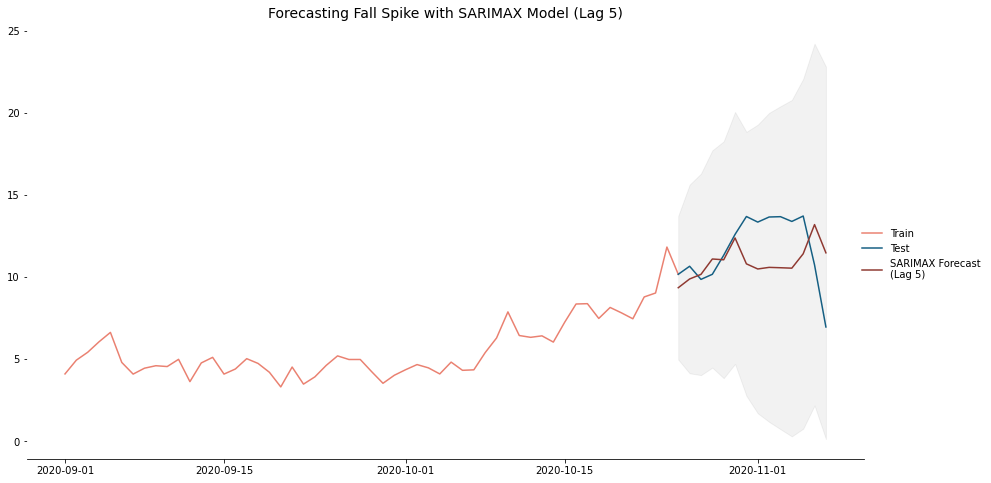

In [152]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 5)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 5)',
                          dist=.85,
                          min=lower_series)

In [153]:
SARIMAX_lag5_metrics = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [154]:
SARIMAX_lag5_metrics

{'mape': 0.17514080385389638,
 'me': -0.7810588529006591,
 'mae': 1.9544795827715171,
 'mpe': -0.032190361935965174,
 'rmse': 2.356810162914693,
 'acf1': 0.5266852188937077,
 'corr': -0.033220638765357156,
 'minmax': 0.1532302857951986}

## Lag 10

In [150]:
# SARIMAX Model with 10-day lag
sxmodel_2 = pm.auto_arima(train, exogenous=testing[['holiday_10', 'restrictions', 'PRCP_10', 'TAVG_10']].iloc[:-13,:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_2.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=1075.998, Time=0.79 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1302.573, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1082.515, Time=0.45 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=1162.425, Time=0.50 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1300.638, Time=0.13 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=1109.203, Time=0.39 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=1084.439, Time=0.52 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=1074.819, Time=0.59 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=1107.347, Time=0.16 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=1078.759, Time=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  239
Model:             SARIMAX(3, 0, 0)x(0, 1, [1], 7)   Log Likelihood                -514.611
Date:                             Sun, 08 Nov 2020   AIC                           1047.221
Time:                                     23:27:27   BIC                           1078.242
Sample:                                 03-01-2020   HQIC                          1059.732
                                      - 10-25-2020                                         
Covariance Type:                               opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_10       0.4419      2.261      0.195      0.845      -3.989       4.873
restrictions     0.0131      1.228      0.011      0.992      -2.394       2.420
PRCP_10         -0.1934      0.466     -0.415      0.678      -1.107       0.720
TAVG_10         -0.0051      0.029     -0.177      0.859      -0.062       0.051
ar.L1            0.9315      0.042     22.347      0.000       0.850       1.013
ar.L2           -0.2966      0.064     -4.660      0.000      -0.421      -0.172
ar.L3            0.3501      0.041      8.609      0.000       0.270       0.430
ma.S.L7         -0.8563      0.074    -11.595      0.000      -1.001      -0.712
sigma2           4.7465      0.311     15.259      0.000       4.137       5.356
===================================================================================
Ljung-Box (Q):                      144.63   Jarque-Bera (JB):               881.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             1.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [157]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_2.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_10', 'restrictions', 'PRCP_10', 'TAVG_10']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


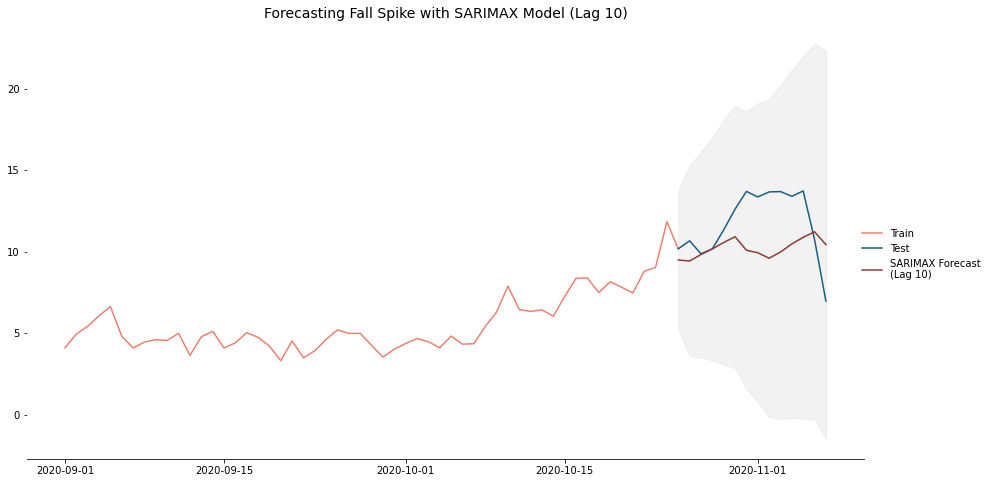

In [158]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 10)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 10)',
                          dist=.85,
                          min=lower_series)

In [159]:
SARIMAX_lag10_metrics = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [160]:
SARIMAX_lag10_metrics

{'mape': 0.1747606296666671,
 'me': -1.504567900609256,
 'mae': 2.067301374431822,
 'mpe': -0.0973362230800124,
 'rmse': 2.5260336151687572,
 'acf1': 0.5368169158429674,
 'corr': 0.0416587769169759,
 'minmax': 0.16281005853917174}

## Lag 15

In [161]:
# SARIMAX Model with 15-day lag
sxmodel_3 = pm.auto_arima(train, exogenous=testing[['holiday_15', 'restrictions', 'PRCP_15', 'TAVG_15']].iloc[:-13,:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_3.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1305.153, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1074.853, Time=0.49 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=1163.088, Time=0.62 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1303.183, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=1107.038, Time=0.16 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=1075.285, Time=0.62 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=1297.814, Time=0.53 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=1076.811, Time=0.59 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=1076.729, Time=0.62 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=1162.977, Time=0.47 sec
 ARIMA(2,0,1)(1,1,0)[7] intercept   : AIC=1065.892, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  239
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 7)   Log Likelihood                -516.354
Date:                           Sun, 08 Nov 2020   AIC                           1052.708
Time:                                   23:31:35   BIC                           1087.176
Sample:                               03-01-2020   HQIC                          1066.609
                                    - 10-25-2020                                         
Covariance Type:                             opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_15      -0.1974      2.686     -0.074      0.941      -5.462       5.067
restrictions     0.0350      1.376      0.025      0.980      -2.662       2.732
PRCP_15          0.2708      0.417      0.650      0.516      -0.546       1.087
TAVG_15         -0.0610      0.030     -2.035      0.042      -0.120      -0.002
ar.L1            0.8581      0.049     17.514      0.000       0.762       0.954
ar.L2           -0.2357      0.066     -3.561      0.000      -0.365      -0.106
ar.L3            0.3392      0.040      8.456      0.000       0.261       0.418
ar.S.L7         -0.7482      0.041    -18.396      0.000      -0.828      -0.668
ar.S.L14        -0.2837      0.047     -5.993      0.000      -0.376      -0.191
sigma2           4.9060      0.278     17.621      0.000       4.360       5.452
===================================================================================
Ljung-Box (Q):                      116.79   Jarque-Bera (JB):               987.10
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [162]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_3.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_15', 'restrictions', 'PRCP_15', 'TAVG_15']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


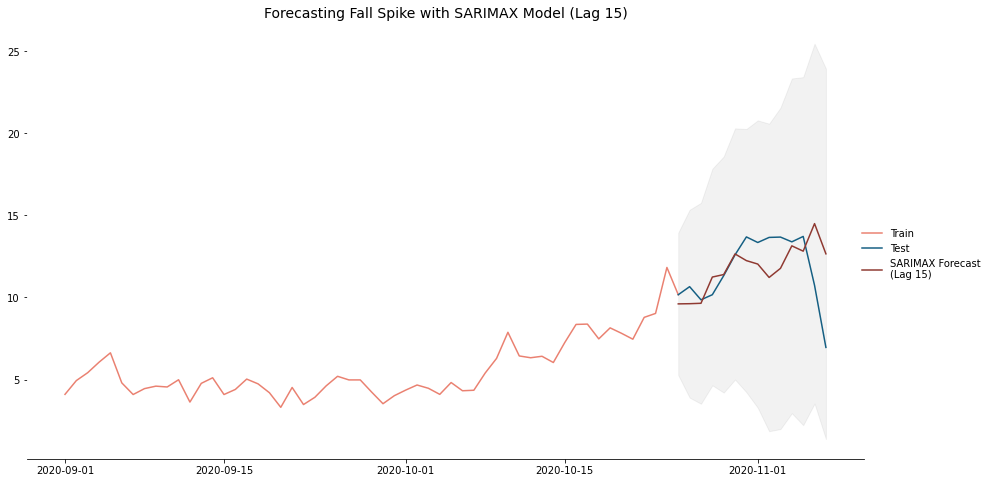

In [163]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 15)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 15)',
                          dist=.85,
                          min=lower_series)

In [164]:
SARIMAX_lag15_metrics = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [165]:
SARIMAX_lag15_metrics

{'mape': 0.14742627084716417,
 'me': 0.04313982015824885,
 'mae': 1.4790034852995255,
 'mpe': 0.03612785491032912,
 'rmse': 2.129283029963885,
 'acf1': 0.461009180502097,
 'corr': 0.23765735350936498,
 'minmax': 0.11387905282302957}

In [166]:
models = [naive_metrics, moving_metrics, smoothing_metrics, SARIMA_metrics, SARIMAX_lag5_metrics,
          SARIMAX_lag10_metrics, SARIMAX_lag15_metrics]
model_names = ['Naive Model', 'Moving Average Model', 'Triple Exponential Smoothing', 'SARIMA', 'SARIMAX (Lag 5)',
               'SARIMAX (Lag 10)', 'SARIMAX (Lag 15)']

In [167]:
model_comparisons = []
for i in range(len(models)):
    model_comparisons.append({'model_name': model_names[i], 'rmse': models[i]['rmse']})

results = pd.DataFrame(model_comparisons)

In [168]:
results

,model_name,rmse
0,Naive Model,2.509832
1,Moving Average Model,3.329556
2,Triple Exponential Smoothing,3.153313
3,SARIMA,2.503013
4,SARIMAX (Lag 5),2.356810
5,SARIMAX (Lag 10),2.526034
6,SARIMAX (Lag 15),2.129283


## Testing Weekly Lags (7 & 14)

In [169]:
# SARIMAX Model with 7-day lag
sxmodel_4 = pm.auto_arima(train, exogenous=testing[['holiday_7', 'restrictions', 'PRCP_7', 'TAVG_7']].iloc[:-13,:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_4.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=1066.292, Time=0.77 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1294.312, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1076.655, Time=0.39 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=1156.674, Time=0.47 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1292.441, Time=0.18 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=1101.598, Time=0.35 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=1077.914, Time=0.64 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=1.72 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=1066.375, Time=0.55 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=1059.010, Time=0.79 sec
 ARIMA(2,0,1)(0,1,0)[7] intercept   : AIC=1097.263, Time=0.39 sec
 ARIMA(2,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(2,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  239
Model:             SARIMAX(3, 0, 0)x(0, 1, [1], 7)   Log Likelihood                -511.703
Date:                             Sun, 08 Nov 2020   AIC                           1041.406
Time:                                     23:33:15   BIC                           1072.426
Sample:                                 03-01-2020   HQIC                          1053.916
                                      - 10-25-2020                                         
Covariance Type:                               opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_7        0.4589      2.838      0.162      0.872      -5.104       6.021
restrictions    -0.0272      1.096     -0.025      0.980      -2.176       2.122
PRCP_7           0.1280      0.425      0.301      0.763      -0.705       0.961
TAVG_7          -0.0675      0.027     -2.511      0.012      -0.120      -0.015
ar.L1            0.9038      0.044     20.462      0.000       0.817       0.990
ar.L2           -0.2538      0.064     -3.960      0.000      -0.379      -0.128
ar.L3            0.3351      0.036      9.409      0.000       0.265       0.405
ma.S.L7         -0.8526      0.073    -11.738      0.000      -0.995      -0.710
sigma2           4.6326      0.323     14.340      0.000       3.999       5.266
===================================================================================
Ljung-Box (Q):                      134.57   Jarque-Bera (JB):               753.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                             1.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [170]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_4.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_7', 'restrictions', 'PRCP_7', 'TAVG_7']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


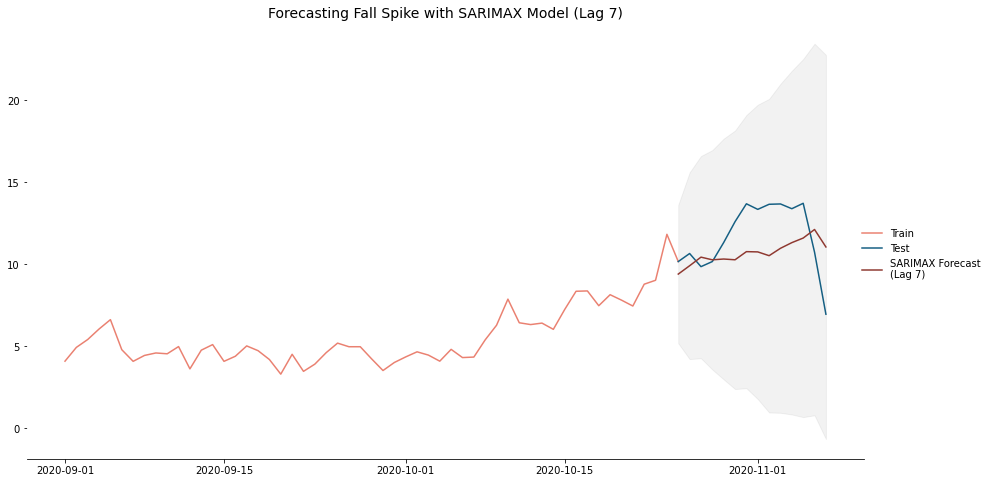

In [171]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 7)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 7)',
                          dist=.85,
                          min=lower_series)

In [172]:
SARIMAX_lag7_metrics = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [173]:
SARIMAX_lag7_metrics

{'mape': 0.1676868587659431,
 'me': -1.0138851409262197,
 'mae': 1.895039367450416,
 'mpe': -0.05526388109265874,
 'rmse': 2.1989027096287277,
 'acf1': 0.5110363345894715,
 'corr': 0.2117770655992973,
 'minmax': 0.1508024833122965}

In [174]:
model_comparisons.append({'model_name': 'SARIMAX (Lag 7)', 'rmse': SARIMAX_lag7_metrics['rmse']})

## Lag 14

In [175]:
# SARIMAX Model with 7-day lag
sxmodel_5 = pm.auto_arima(train, exogenous=testing[['holiday_14', 'restrictions', 'PRCP_14', 'TAVG_14']].iloc[:-13,:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_5.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=1075.110, Time=0.76 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1304.829, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1080.538, Time=0.46 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=1159.122, Time=0.51 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1302.859, Time=0.10 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=1104.912, Time=0.32 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=1082.534, Time=0.58 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=1073.680, Time=0.57 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=1103.483, Time=0.15 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=inf, Time=1.19 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  239
Model:             SARIMAX(3, 0, 0)x(0, 1, [1], 7)   Log Likelihood                -513.097
Date:                             Sun, 08 Nov 2020   AIC                           1044.193
Time:                                     23:36:07   BIC                           1075.214
Sample:                                 03-01-2020   HQIC                          1056.704
                                      - 10-25-2020                                         
Covariance Type:                               opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_14       0.8249      2.287      0.361      0.718      -3.657       5.306
restrictions    -0.0727      1.274     -0.057      0.954      -2.569       2.424
PRCP_14         -0.4112      0.456     -0.901      0.368      -1.306       0.483
TAVG_14          0.0120      0.026      0.464      0.643      -0.039       0.063
ar.L1            0.9441      0.041     22.807      0.000       0.863       1.025
ar.L2           -0.3193      0.057     -5.562      0.000      -0.432      -0.207
ar.L3            0.3606      0.033     10.810      0.000       0.295       0.426
ma.S.L7         -0.8674      0.072    -11.966      0.000      -1.010      -0.725
sigma2           4.6761      0.315     14.864      0.000       4.060       5.293
===================================================================================
Ljung-Box (Q):                      140.25   Jarque-Bera (JB):               876.03
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                             1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [176]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_5.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_14', 'restrictions', 'PRCP_14', 'TAVG_14']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


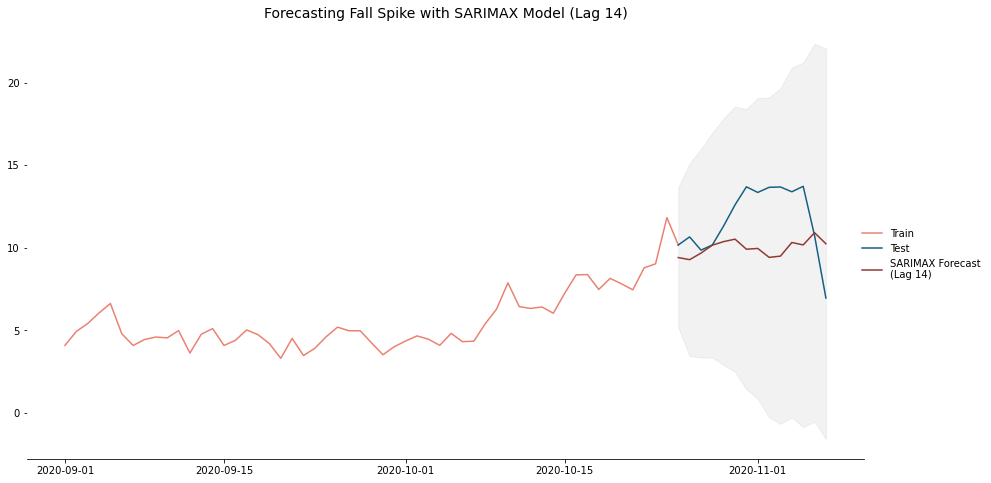

In [177]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 14)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 14)',
                          dist=.85,
                          min=lower_series)

In [178]:
SARIMAX_lag14_metrics = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [179]:
SARIMAX_lag14_metrics

{'mape': 0.18529620664368646,
 'me': -1.7216032360976625,
 'mae': 2.2158583405192145,
 'mpe': -0.11554438448113906,
 'rmse': 2.6958066562397813,
 'acf1': 0.5126132069727528,
 'corr': -0.09121887674372998,
 'minmax': 0.17446709453546438}

In [180]:
model_comparisons.append({'model_name': 'SARIMAX (Lag 14)', 'rmse': SARIMAX_lag14_metrics['rmse']})

In [181]:
pd.DataFrame(model_comparisons)

,model_name,rmse
0,Naive Model,2.509832
1,Moving Average Model,3.329556
2,Triple Exponential Smoothing,3.153313
3,SARIMA,2.503013
4,SARIMAX (Lag 5),2.356810
5,SARIMAX (Lag 10),2.526034
6,SARIMAX (Lag 15),2.129283
7,SARIMAX (Lag 7),2.198903
8,SARIMAX (Lag 14),2.695807


## Tweaking model training period for best performing models

### Lag 15

In [183]:
# SARIMAX Model with 15-day lag
sxmodel_6 = pm.auto_arima(train.loc['2020-07-01':], exogenous=testing[['holiday_15', 'restrictions', 'PRCP_15', 'TAVG_15']].loc['2020-07-01':'2020-10-25',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_6.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=225.396, Time=0.44 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=285.541, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=243.157, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=223.665, Time=0.25 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=257.501, Time=0.17 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=224.240, Time=0.36 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=223.626, Time=0.53 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=227.486, Time=0.70 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=245.947, Time=0.37 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=225.327, Time=0.55 sec
 ARIMA(0,1,2)(0,1,2)[7]             : AIC=225.285, Time=0.59 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=230.828, Time=0.37 sec
 ARIMA(1,1,2)(0,1,2)[7]             : AIC=224.732, Time=0.83 sec
 ARIMA(0,1,1)(0,1,2)[7] intercept   : AIC=224.205, Time=0.69 sec

Best model:  ARIMA(0,1,1)(0,1,2)[7]          


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  117
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood                -103.813
Date:                                Sun, 08 Nov 2020   AIC                            223.626
Time:                                        23:42:48   BIC                            245.156
Sample:                                    07-01-2020   HQIC                           232.357
                                         - 10-25-2020                                         
Covariance Type:                                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_15      -0.1000      0.562     -0.178      0.859      -1.201       1.001
restrictions    -0.2736      0.344     -0.796      0.426      -0.947       0.400
PRCP_15          0.2230      0.215      1.039      0.299      -0.198       0.644
TAVG_15          0.0020      0.016      0.127      0.899      -0.029       0.033
ma.L1           -0.5479      0.085     -6.449      0.000      -0.714      -0.381
ma.S.L7         -0.7168      0.116     -6.186      0.000      -0.944      -0.490
ma.S.L14         0.1946      0.103      1.891      0.059      -0.007       0.396
sigma2           0.3790      0.041      9.158      0.000       0.298       0.460
===================================================================================
Ljung-Box (Q):                       21.31   Jarque-Bera (JB):                21.20
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.46
Prob(H) (two-sided):                  0.19   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [202]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_6.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_15', 'restrictions', 'PRCP_15', 'TAVG_15']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


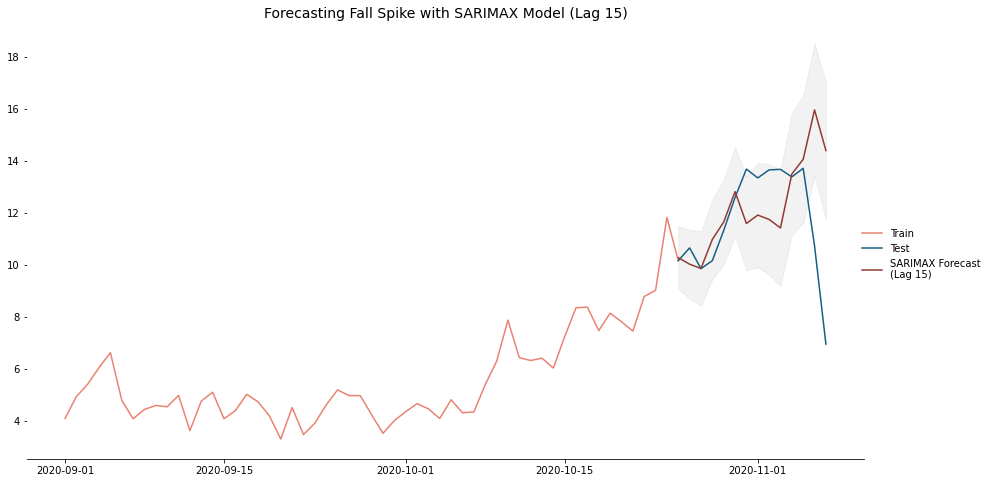

In [203]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 15)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 15)',
                          dist=.85,
                          min=lower_series)

In [204]:
SARIMAX_lag15_metrics_v2 = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [205]:
SARIMAX_lag15_metrics_v2

{'mape': 0.1679534241756561,
 'me': 0.45110273307955756,
 'mae': 1.637169227694184,
 'mpe': 0.07901648011224228,
 'rmse': 2.6622804416834693,
 'acf1': 0.5257488570918103,
 'corr': -0.0011165500700771158,
 'minmax': 0.1165167526752271}

In [206]:
model_comparisons.append({'model_name': 'SARIMAX (Lag 15) - Shorter Train', 'rmse': SARIMAX_lag15_metrics_v2['rmse']})

## Lag 7

In [208]:
# SARIMAX Model with 15-day lag
sxmodel_7 = pm.auto_arima(train.loc['2020-07-01':], exogenous=testing[['holiday_7', 'restrictions', 'PRCP_7', 'TAVG_7']].loc['2020-07-01':'2020-10-25',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_7.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=222.420, Time=0.45 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=282.411, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=240.380, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=220.428, Time=0.33 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=250.795, Time=0.20 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=221.298, Time=0.41 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=220.673, Time=0.42 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=227.694, Time=0.28 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=224.312, Time=0.69 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=245.721, Time=0.13 sec
 ARIMA(0,1,2)(0,1,1)[7]             : AIC=222.417, Time=0.33 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=227.949, Time=0.24 sec
 ARIMA(1,1,2)(0,1,1)[7]             : AIC=224.326, Time=0.51 sec
 ARIMA(0,1,1)(0,1,1)[7] intercept   : AIC=221.050, Time=0.44 sec

Best model:  ARIMA(0,1,1)(0,1,1)[7]          


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  117
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood                -103.214
Date:                           Sun, 08 Nov 2020   AIC                            220.428
Time:                                   23:59:15   BIC                            239.268
Sample:                               07-01-2020   HQIC                           228.068
                                    - 10-25-2020                                         
Covariance Type:                             opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_7        0.4898      0.337      1.451      0.147      -0.172       1.151
restrictions    -0.4017      0.340     -1.181      0.238      -1.068       0.265
PRCP_7           0.2893      0.300      0.965      0.334      -0.298       0.877
TAVG_7          -0.0131      0.013     -1.024      0.306      -0.038       0.012
ma.L1           -0.5645      0.075     -7.477      0.000      -0.712      -0.417
ma.S.L7         -0.6210      0.103     -6.055      0.000      -0.822      -0.420
sigma2           0.3757      0.039      9.689      0.000       0.300       0.452
===================================================================================
Ljung-Box (Q):                       23.45   Jarque-Bera (JB):                27.93
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                             0.41
Prob(H) (two-sided):                  0.12   Kurtosis:                         5.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [198]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_7.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_7', 'restrictions', 'PRCP_7', 'TAVG_7']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


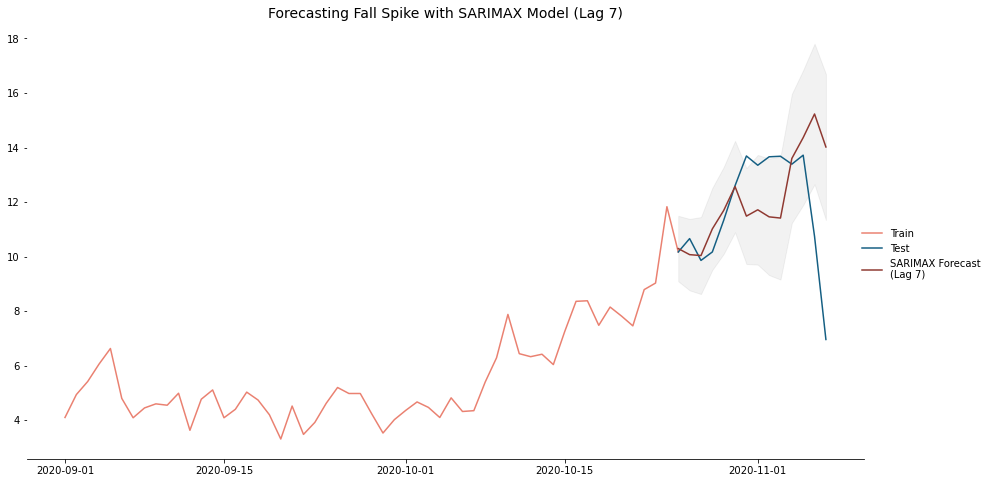

In [199]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 7)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 7)',
                          dist=.85,
                          min=lower_series)

In [200]:
SARIMAX_lag7_metrics_v2 = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [201]:
SARIMAX_lag7_metrics_v2

{'mape': 0.16487579742858774,
 'me': 0.3559074473629085,
 'mae': 1.6313838909407756,
 'mpe': 0.06943274302531373,
 'rmse': 2.5244121779323887,
 'acf1': 0.5425002303585313,
 'corr': 0.032409854404707894,
 'minmax': 0.11886360084304814}

In [ ]:
model_comparisons.append({'model_name': 'SARIMAX (Lag 7) - Shorter Train', 'rmse': SARIMAX_lag7_metrics_v2['rmse']})

## Lag 15 - Starting April 15

In [258]:
# SARIMAX Model with 15-day lag
sxmodel_8 = pm.auto_arima(train.loc['2020-04-15':], exogenous=testing[['holiday_15', 'restrictions', 'PRCP_15', 'TAVG_15']].loc['2020-04-15':'2020-10-25',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_8.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=566.613, Time=0.80 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=790.536, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=593.980, Time=0.60 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=700.702, Time=0.66 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=801.779, Time=0.10 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=647.111, Time=0.36 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=563.175, Time=0.78 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=578.281, Time=0.67 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=562.170, Time=1.43 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=564.604, Time=1.23 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=566.138, Time=1.43 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=683.144, Time=1.05 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=577.590, Time=1.14 sec
 ARIMA(2,0,1)(1,1,2)[7] intercept   : AIC=567.396, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  194
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 7)   Log Likelihood                -269.927
Date:                                Mon, 09 Nov 2020   AIC                            559.855
Time:                                        11:02:16   BIC                            592.166
Sample:                                    04-15-2020   HQIC                           572.947
                                         - 10-25-2020                                         
Covariance Type:                                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_15      -0.2012      0.619     -0.325      0.745      -1.414       1.011
restrictions    -0.0564      0.556     -0.101      0.919      -1.147       1.034
PRCP_15          0.1335      0.147      0.909      0.363      -0.154       0.421
TAVG_15         -0.0109      0.012     -0.879      0.379      -0.035       0.013
ar.L1            0.9923      0.007    139.483      0.000       0.978       1.006
ma.L1           -0.3456      0.066     -5.218      0.000      -0.475      -0.216
ar.S.L7         -0.8684      0.091     -9.568      0.000      -1.046      -0.690
ma.S.L7         -0.0143      0.135     -0.105      0.916      -0.280       0.251
ma.S.L14        -0.4806      0.135     -3.555      0.000      -0.746      -0.216
sigma2           0.9978      0.073     13.589      0.000       0.854       1.142
===================================================================================
Ljung-Box (Q):                       41.48   Jarque-Bera (JB):               140.75
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [259]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_8.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_15', 'restrictions', 'PRCP_15', 'TAVG_15']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


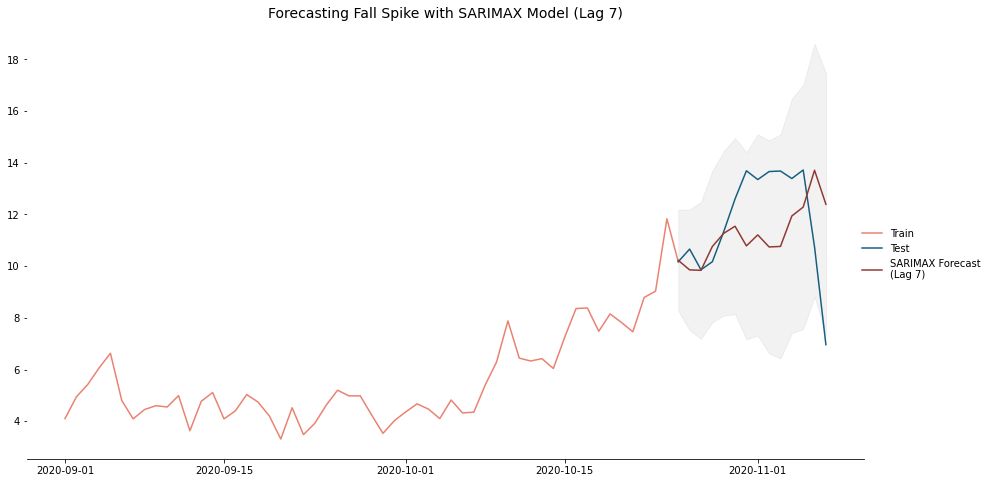

In [260]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 7)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 7)',
                          dist=.85,
                          min=lower_series)

In [261]:
SARIMAX_lag15_metrics_v3 = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [262]:
SARIMAX_lag15_metrics_v3

{'mape': 0.1642814711767165,
 'me': -0.4760599940807384,
 'mae': 1.7685385074094644,
 'mpe': -0.004206697887514702,
 'rmse': 2.3096410944776733,
 'acf1': 0.5064550619045122,
 'corr': -0.02975124473676765,
 'minmax': 0.13532457139078125}

In [263]:
model_comparisons.append({'model_name': 'SARIMAX (Lag 15) - April 15', 'rmse': SARIMAX_lag15_metrics_v3['rmse']})

## Creating "tightening restrictions" and "loosening restricitons" features

In [235]:
testing.reset_index(inplace=True)

In [238]:
# Creating  recovery phases feature
conditions = [
    (testing.Date=='2020-03-16'),
    (testing.Date=='2020-07-24'),
    (testing.Date=='2020-10-23')
]

choices = [
    1,
    1,
    1
]

testing['tight_res'] = np.select(conditions, choices, default=0)

In [240]:
# Creating  recovery phases feature
conditions = [
    (testing.Date=='2020-05-01'),
    (testing.Date=='2020-06-05'),
    (testing.Date=='2020-06-26'),
    (testing.Date=='2020-10-01')
]

choices = [
    1,
    1,
    1,
    1
]

testing['loose_res'] = np.select(conditions, choices, default=0)

In [242]:
# Creating lagged tighening restrictions vars
testing['tight_res_5'] = testing.tight_res.shift(5)
testing['tight_res_7'] = testing.tight_res.shift(7)
testing['tight_res_10'] = testing.tight_res.shift(10)
testing['tight_res_14'] = testing.tight_res.shift(14)
testing['tight_res_15'] = testing.tight_res.shift(15)

# Creating lagged loosening restrictions vars
testing['loose_res_5'] = testing.loose_res.shift(5)
testing['loose_res_7'] = testing.loose_res.shift(7)
testing['loose_res_10'] = testing.loose_res.shift(10)
testing['loose_res_14'] = testing.loose_res.shift(14)
testing['loose_res_15'] = testing.loose_res.shift(15)

In [246]:
testing.iloc[:,-10:] = testing.iloc[:,-10:].replace(np.nan, 0)

In [248]:
testing.set_index('Date', inplace=True)

## Testing Restrictions (Lag 5)

In [264]:
# SARIMAX Model with no lag and starting on 4-15
sxmodel_9 = pm.auto_arima(train.loc['2020-04-15':], exogenous=testing[['holiday_5', 'tight_res_5', 'loose_res_5', 'PRCP_5', 'TAVG_5']].loc['2020-04-15':'2020-10-25',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_9.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=563.662, Time=0.81 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=797.050, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=588.924, Time=0.68 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=703.487, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=814.071, Time=0.11 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=646.729, Time=0.48 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=558.830, Time=0.81 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=571.922, Time=0.73 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=559.447, Time=1.43 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=556.051, Time=1.39 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=561.076, Time=1.27 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=560.209, Time=1.52 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=573.742, Time=1.23 sec
 ARIMA(2,0,1)(1,1,2)[7] intercept   : AIC=563.093, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  194
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 7)   Log Likelihood                -266.163
Date:                                Mon, 09 Nov 2020   AIC                            554.326
Time:                                        11:03:32   BIC                            589.869
Sample:                                    04-15-2020   HQIC                           568.728
                                         - 10-25-2020                                         
Covariance Type:                                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
holiday_5      -0.1251      0.470     -0.266      0.790      -1.046       0.796
tight_res_5     1.0022      1.724      0.581      0.561      -2.377       4.381
loose_res_5    -0.2114      0.552     -0.383      0.702      -1.294       0.871
PRCP_5          0.2684      0.160      1.675      0.094      -0.046       0.582
TAVG_5         -0.0279      0.012     -2.294      0.022      -0.052      -0.004
ar.L1           0.9901      0.009    116.002      0.000       0.973       1.007
ma.L1          -0.3631      0.068     -5.329      0.000      -0.497      -0.230
ar.S.L7        -0.8868      0.073    -12.219      0.000      -1.029      -0.745
ma.S.L7        -0.0120      0.128     -0.094      0.925      -0.262       0.238
ma.S.L14       -0.4924      0.121     -4.066      0.000      -0.730      -0.255
sigma2          0.9609      0.076     12.691      0.000       0.813       1.109
===================================================================================
Ljung-Box (Q):                       38.78   Jarque-Bera (JB):               142.53
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [265]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_9.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_5', 'tight_res_5', 'loose_res_5', 'PRCP_5', 'TAVG_5']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


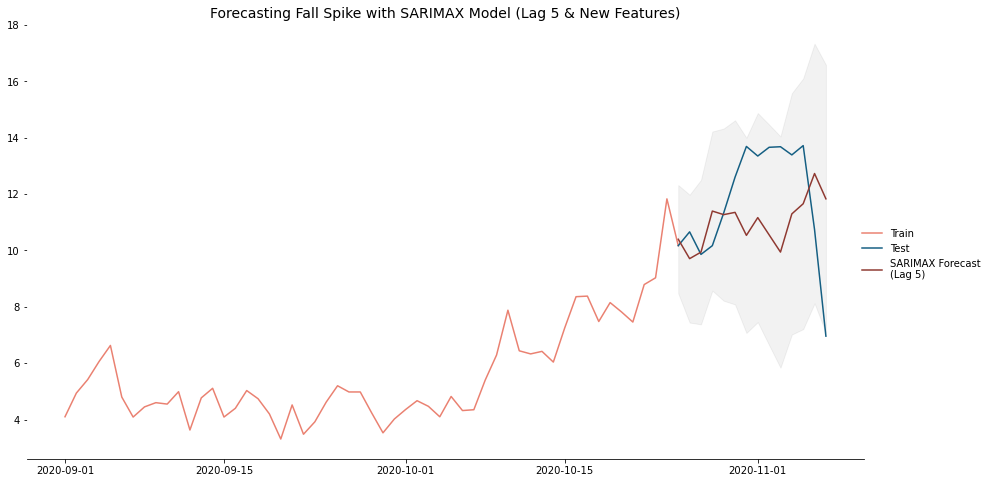

In [266]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 5)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 5 & New Features)',
                          dist=.85,
                          min=lower_series)

In [270]:
SARIMAX_lag5_metrics_v4 = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [271]:
SARIMAX_lag5_metrics_v4

{'mape': 0.17365604829586417,
 'me': -0.7285382823602902,
 'mae': 1.9280682352740814,
 'mpe': -0.025596213234990024,
 'rmse': 2.370821547211814,
 'acf1': 0.49228027151326953,
 'corr': -0.15820325515017414,
 'minmax': 0.15003581874364447}

In [273]:
model_comparisons.append({'model_name': 'SARIMAX (Lag 5) - April 15', 'rmse': SARIMAX_lag5_metrics_v4['rmse']})

## Testing Restrictions (Lag 10)

In [274]:
# SARIMAX Model with no lag and starting on 4-15
sxmodel_10 = pm.auto_arima(train.loc['2020-04-15':], exogenous=testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].loc['2020-04-15':'2020-10-25',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_10.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=565.334, Time=0.95 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=802.652, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=587.402, Time=0.76 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=707.481, Time=0.70 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=819.194, Time=0.13 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=646.741, Time=0.44 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=562.831, Time=1.57 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=560.663, Time=1.53 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=563.468, Time=1.63 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=681.034, Time=1.37 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=573.604, Time=1.32 sec
 ARIMA(2,0,1)(1,1,2)[7] intercept   : AIC=568.127, Time=1.50 sec
 ARIMA(1,0,2)(1,1,2)[7] intercept   : AIC=562.534, Time

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  194
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 7)   Log Likelihood                -268.424
Date:                                Mon, 09 Nov 2020   AIC                            558.849
Time:                                        11:08:39   BIC                            594.391
Sample:                                    04-15-2020   HQIC                           573.250
                                         - 10-25-2020                                         
Covariance Type:                                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_10       0.2000      0.966      0.207      0.836      -1.693       2.093
tight_res_10     0.1664      3.572      0.047      0.963      -6.834       7.167
loose_res_10    -0.6390      0.528     -1.211      0.226      -1.673       0.395
PRCP_10         -0.1620      0.182     -0.890      0.374      -0.519       0.195
TAVG_10         -0.0056      0.011     -0.492      0.623      -0.028       0.017
ar.L1            0.9911      0.008    128.035      0.000       0.976       1.006
ma.L1           -0.3260      0.070     -4.685      0.000      -0.462      -0.190
ar.S.L7         -0.8229      0.105     -7.858      0.000      -1.028      -0.618
ma.S.L7         -0.0733      0.146     -0.502      0.616      -0.360       0.213
ma.S.L14        -0.4336      0.144     -3.009      0.003      -0.716      -0.151
sigma2           0.9849      0.074     13.361      0.000       0.840       1.129
===================================================================================
Ljung-Box (Q):                       42.24   Jarque-Bera (JB):               159.55
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [275]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_10.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


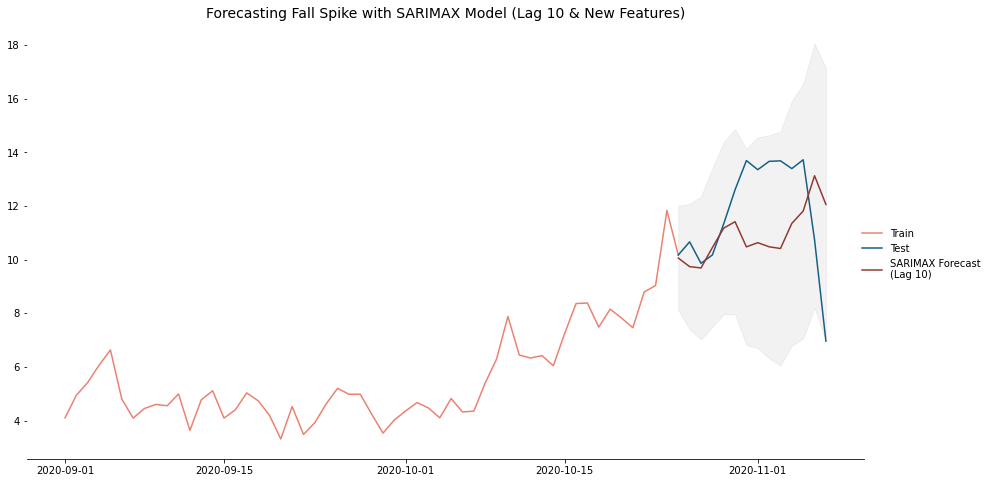

In [276]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 10)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 10 & New Features)',
                          dist=.85,
                          min=lower_series)

In [277]:
SARIMAX_lag10_metrics_v4 = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [278]:
SARIMAX_lag10_metrics_v4

{'mape': 0.17195492972109988,
 'me': -0.7965008005696438,
 'mae': 1.903975151913778,
 'mpe': -0.03183048033788212,
 'rmse': 2.3971248911391885,
 'acf1': 0.5127762721155501,
 'corr': -0.09035525384050878,
 'minmax': 0.14692788833647163}

In [279]:
model_comparisons.append({'model_name': 'SARIMAX (Lag 10) - April 15', 'rmse': SARIMAX_lag10_metrics_v4['rmse']})

## Testing Restrictions (Lag 15)

In [280]:
# SARIMAX Model with 15-day lag and starting on 4-15
sxmodel_11 = pm.auto_arima(train.loc['2020-04-15':], exogenous=testing[['holiday_15', 'tight_res_15', 'loose_res_15', 'PRCP_15', 'TAVG_15']].loc['2020-04-15':'2020-10-25',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_11.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=568.305, Time=0.81 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=802.446, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=596.597, Time=0.91 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=704.035, Time=0.94 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=818.853, Time=0.20 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=646.798, Time=0.53 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=566.441, Time=1.58 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=563.845, Time=1.60 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=568.206, Time=1.98 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=568.904, Time=1.73 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=685.541, Time=1.48 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=578.934, Time=1.64 sec
 ARIMA(2,0,1)(1,1,2)[7] intercept   : AIC=568.337, Time=2.05 sec
 ARIMA(1,0,2)(1,1,2)[7] intercept   : AIC=564.936, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  194
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 7)   Log Likelihood                -269.935
Date:                                Mon, 09 Nov 2020   AIC                            561.871
Time:                                        11:13:57   BIC                            597.413
Sample:                                    04-15-2020   HQIC                           576.272
                                         - 10-25-2020                                         
Covariance Type:                                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_15      -0.2415      0.612     -0.395      0.693      -1.441       0.958
tight_res_15    -0.0790      1.488     -0.053      0.958      -2.995       2.837
loose_res_15     0.0444      0.299      0.148      0.882      -0.542       0.630
PRCP_15          0.1316      0.154      0.855      0.392      -0.170       0.433
TAVG_15         -0.0113      0.012     -0.906      0.365      -0.036       0.013
ar.L1            0.9941      0.006    157.921      0.000       0.982       1.006
ma.L1           -0.3462      0.067     -5.178      0.000      -0.477      -0.215
ar.S.L7         -0.8581      0.098     -8.798      0.000      -1.049      -0.667
ma.S.L7         -0.0316      0.142     -0.223      0.824      -0.310       0.246
ma.S.L14        -0.4783      0.139     -3.434      0.001      -0.751      -0.205
sigma2           1.0019      0.077     13.026      0.000       0.851       1.153
===================================================================================
Ljung-Box (Q):                       41.92   Jarque-Bera (JB):               140.64
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [281]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_11.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_15', 'tight_res_15', 'loose_res_15', 'PRCP_15', 'TAVG_15']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


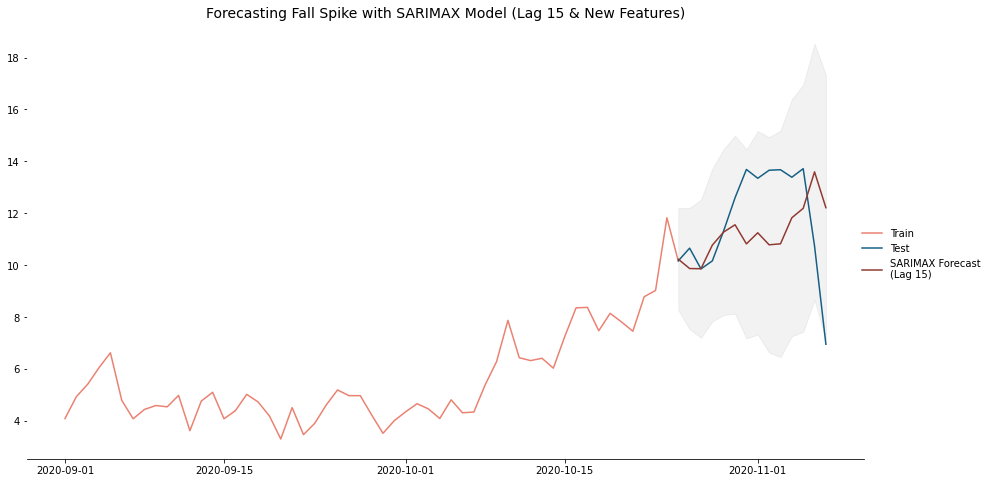

In [282]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 15)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 15 & New Features)',
                          dist=.85,
                          min=lower_series)

In [283]:
SARIMAX_lag15_metrics_v4 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 15) - April 15', 'rmse': SARIMAX_lag15_metrics_v4['rmse']})
SARIMAX_lag15_metrics_v4

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.1615643580141872,
 'me': -0.48982111562086855,
 'mae': 1.7460795221178897,
 'mpe': -0.006108155307097534,
 'rmse': 2.262140872705183,
 'acf1': 0.5047655120823223,
 'corr': -0.0006950700623778255,
 'minmax': 0.1341145326005323}

## Testing Restrictions (Lag 7)

In [284]:
# SARIMAX Model with 7-day lag and starting on 4-15
sxmodel_12 = pm.auto_arima(train.loc['2020-04-15':], exogenous=testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].loc['2020-04-15':'2020-10-25',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_12.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=564.145, Time=0.86 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=789.218, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=593.444, Time=0.75 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=698.759, Time=0.53 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=806.820, Time=0.12 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=636.907, Time=0.49 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=561.790, Time=1.14 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=576.935, Time=0.90 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=561.583, Time=1.78 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=562.851, Time=1.50 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=563.246, Time=1.91 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=684.798, Time=1.51 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=577.524, Time=1.64 sec
 ARIMA(2,0,1)(1,1,2)[7] intercept   : AIC=567.849, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  194
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 7)   Log Likelihood                -268.771
Date:                                Mon, 09 Nov 2020   AIC                            559.541
Time:                                        11:18:11   BIC                            595.084
Sample:                                    04-15-2020   HQIC                           573.943
                                         - 10-25-2020                                         
Covariance Type:                                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
holiday_7       0.4905      1.113      0.441      0.659      -1.690       2.671
tight_res_7     0.7080      2.250      0.315      0.753      -3.701       5.118
loose_res_7    -0.5229      0.355     -1.472      0.141      -1.219       0.173
PRCP_7          0.1562      0.162      0.966      0.334      -0.161       0.473
TAVG_7         -0.0021      0.011     -0.188      0.851      -0.024       0.020
ar.L1           0.9956      0.006    178.801      0.000       0.985       1.007
ma.L1          -0.3627      0.069     -5.228      0.000      -0.499      -0.227
ar.S.L7        -0.8061      0.132     -6.097      0.000      -1.065      -0.547
ma.S.L7        -0.0780      0.166     -0.470      0.638      -0.403       0.247
ma.S.L14       -0.4474      0.166     -2.693      0.007      -0.773      -0.122
sigma2          0.9898      0.077     12.893      0.000       0.839       1.140
===================================================================================
Ljung-Box (Q):                       41.69   Jarque-Bera (JB):               185.97
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [285]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_12.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


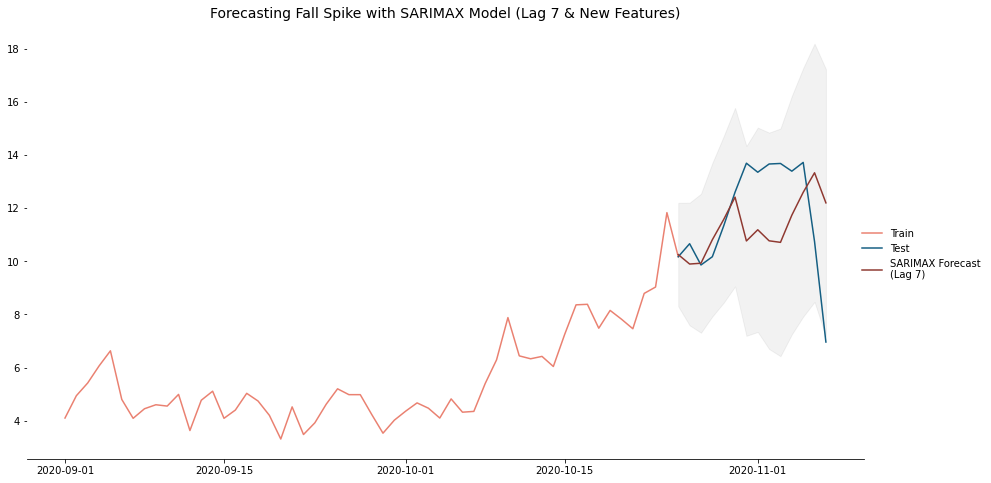

In [286]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 7)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 7 & New Features)',
                          dist=.85,
                          min=lower_series)

In [287]:
SARIMAX_lag7_metrics_v4 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 7) - April 15', 'rmse': SARIMAX_lag7_metrics_v4['rmse']})
SARIMAX_lag7_metrics_v4

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.15638623083778067,
 'me': -0.41648850474201643,
 'mae': 1.6814667615264214,
 'mpe': -0.0003233625893412124,
 'rmse': 2.230687696273942,
 'acf1': 0.511235728746448,
 'corr': 0.03320811368542923,
 'minmax': 0.1296567798163455}

## Testing Restrictions (Lag 14)

In [288]:
# SARIMAX Model with 14-day lag and starting on 4-15
sxmodel_13 = pm.auto_arima(train.loc['2020-04-15':], exogenous=testing[['holiday_14', 'tight_res_14', 'loose_res_14', 'PRCP_14', 'TAVG_14']].loc['2020-04-15':'2020-10-25',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_13.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=563.964, Time=0.89 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=800.136, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=588.251, Time=0.81 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=702.961, Time=0.98 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=816.686, Time=0.18 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=645.600, Time=0.73 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=561.941, Time=1.46 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=558.419, Time=1.58 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=562.114, Time=2.00 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=682.168, Time=1.63 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=572.015, Time=1.62 sec
 ARIMA(2,0,1)(1,1,2)[7] intercept   : AIC=565.591, Time=2.16 sec
 ARIMA(1,0,2)(1,1,2)[7] intercept   : AIC=560.346, Time

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  194
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 7)   Log Likelihood                -267.258
Date:                                Mon, 09 Nov 2020   AIC                            556.517
Time:                                        11:21:18   BIC                            592.059
Sample:                                    04-15-2020   HQIC                           570.918
                                         - 10-25-2020                                         
Covariance Type:                                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_14       0.8166      0.417      1.957      0.050      -0.001       1.634
tight_res_14     0.0712      2.529      0.028      0.978      -4.886       5.028
loose_res_14     0.4917      0.406      1.211      0.226      -0.304       1.287
PRCP_14         -0.0234      0.230     -0.102      0.919      -0.475       0.428
TAVG_14         -0.0172      0.012     -1.423      0.155      -0.041       0.007
ar.L1            0.9915      0.009    110.535      0.000       0.974       1.009
ma.L1           -0.3284      0.069     -4.779      0.000      -0.463      -0.194
ar.S.L7         -0.8529      0.098     -8.732      0.000      -1.044      -0.661
ma.S.L7         -0.0373      0.147     -0.254      0.800      -0.325       0.251
ma.S.L14        -0.4702      0.138     -3.412      0.001      -0.740      -0.200
sigma2           0.9755      0.088     11.026      0.000       0.802       1.149
===================================================================================
Ljung-Box (Q):                       38.87   Jarque-Bera (JB):               113.00
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [289]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_13.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_14', 'tight_res_14', 'loose_res_14', 'PRCP_14', 'TAVG_14']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


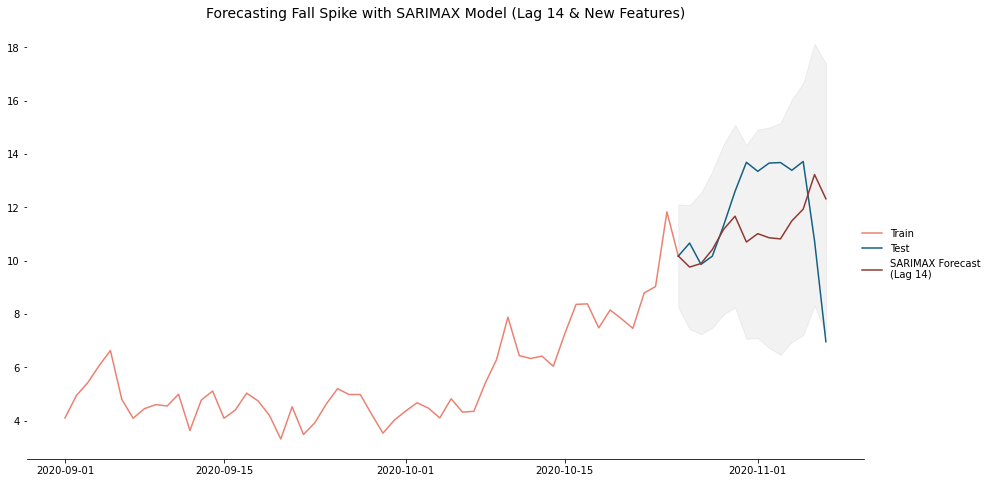

In [290]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 14)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 14 & New Features)',
                          dist=.85,
                          min=lower_series)

In [291]:
SARIMAX_lag14_metrics_v4 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 14) - April 15', 'rmse': SARIMAX_lag14_metrics_v4['rmse']})
SARIMAX_lag14_metrics_v4

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.16298888986012786,
 'me': -0.6091813526279238,
 'mae': 1.77125347802654,
 'mpe': -0.015845245839646718,
 'rmse': 2.2980890650034635,
 'acf1': 0.4844789894758716,
 'corr': -0.03495980956015995,
 'minmax': 0.13590329264430334}

In [292]:
pd.DataFrame(model_comparisons)

,model_name,rmse
0,Naive Model,2.509832
1,Moving Average Model,3.329556
2,Triple Exponential Smoothing,3.153313
3,SARIMA,2.503013
4,SARIMAX (Lag 5),2.356810
5,SARIMAX (Lag 10),2.526034
6,SARIMAX (Lag 15),2.129283
7,SARIMAX (Lag 7),2.198903
8,SARIMAX (Lag 14),2.695807
9,SARIMAX (Lag 14) - Shorter Train,2.662280


## Tweaking training period for SARIMAX Lag 7 to see if I can beat previous best
### Starting on 7-1

In [294]:
# SARIMAX Model with 7-day lag and starting on 7-1
sxmodel_14 = pm.auto_arima(train.loc['2020-07-01':], exogenous=testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].loc['2020-07-01':'2020-10-25',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_14.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=223.080, Time=0.58 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=280.980, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=238.051, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=221.080, Time=0.47 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=253.407, Time=0.22 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=220.950, Time=0.58 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=226.461, Time=0.32 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=219.389, Time=0.85 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=217.601, Time=0.72 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=239.903, Time=0.67 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=219.601, Time=0.95 sec
 ARIMA(0,1,2)(2,1,0)[7]             : AIC=219.600, Time=0.88 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=224.379, Time=0.81 sec
 ARIMA(1,1,2)(2,1,0)[7]             : AIC=219.451, Time=1.05 sec
 ARIMA(0,1,1)(2,1,0)[7] intercept   : AIC=218.2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  117
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 7)   Log Likelihood                 -99.801
Date:                            Mon, 09 Nov 2020   AIC                            217.601
Time:                                    11:47:28   BIC                            241.823
Sample:                                07-01-2020   HQIC                           227.424
                                     - 10-25-2020                                         
Covariance Type:                              opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
holiday_7       0.4605      0.387      1.191      0.234      -0.297       1.218
tight_res_7     0.5513      0.909      0.607      0.544      -1.230       2.333
loose_res_7    -0.7024      0.329     -2.138      0.033      -1.346      -0.058
PRCP_7          0.6418      0.313      2.048      0.041       0.028       1.256
TAVG_7         -0.0113      0.013     -0.856      0.392      -0.037       0.015
ma.L1          -0.5209      0.090     -5.813      0.000      -0.697      -0.345
ar.S.L7        -0.6908      0.115     -5.988      0.000      -0.917      -0.465
ar.S.L14       -0.3446      0.087     -3.975      0.000      -0.514      -0.175
sigma2          0.3515      0.037      9.491      0.000       0.279       0.424
===================================================================================
Ljung-Box (Q):                       25.24   Jarque-Bera (JB):                32.66
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                             0.55
Prob(H) (two-sided):                  0.11   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [295]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_14.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


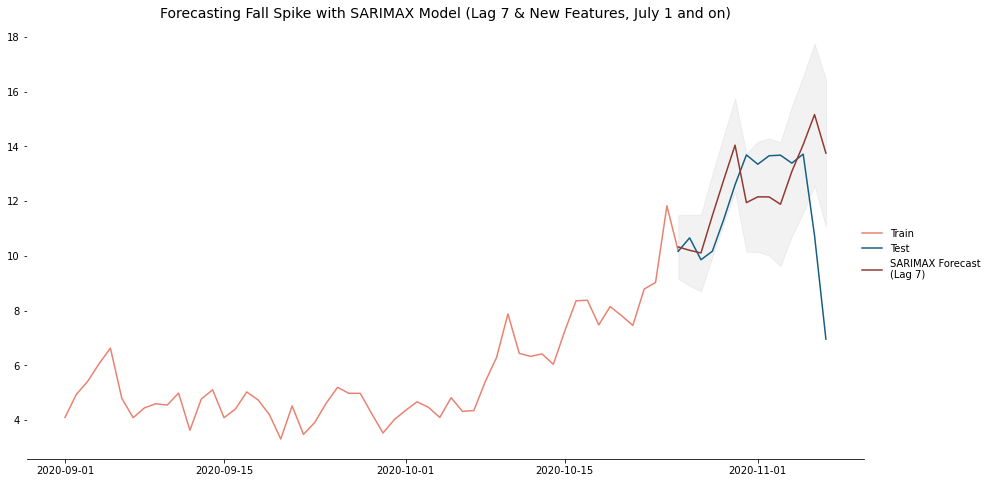

In [296]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 7)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 7 & New Features, July 1 and on)',
                          dist=.85,
                          min=lower_series)

In [297]:
SARIMAX_lag7_metrics_v5 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 7) - July 1', 'rmse': SARIMAX_lag7_metrics_v5['rmse']})
SARIMAX_lag7_metrics_v5

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.16768607069831518,
 'me': 0.6549949239380969,
 'mae': 1.6539677015113965,
 'mpe': 0.09292854608007682,
 'rmse': 2.420973053059209,
 'acf1': 0.5037029767688219,
 'corr': 0.12277688452702683,
 'minmax': 0.121638450816139}

## Starting on 3-1

In [298]:
# SARIMAX Model with 7-day lag and starting on 3-1
sxmodel_15 = pm.auto_arima(train, exogenous=testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].loc[:'2020-10-25',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_15.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1295.714, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1077.790, Time=0.64 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=1156.394, Time=0.61 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1293.857, Time=0.23 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=1099.394, Time=0.35 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=1077.487, Time=1.80 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=1278.688, Time=1.65 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=1079.066, Time=1.68 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=1077.668, Time=1.84 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=1153.425, Time=1.77 sec
 ARIMA(2,0,1)(2,1,0)[7] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(1,0,0)(2,1,0)[7]             : AIC=1075.680, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  239
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 7)   Log Likelihood                -528.840
Date:                           Mon, 09 Nov 2020   AIC                           1075.680
Time:                                   11:52:02   BIC                           1106.700
Sample:                               03-01-2020   HQIC                          1088.190
                                    - 10-25-2020                                         
Covariance Type:                             opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
holiday_7       0.4441      2.577      0.172      0.863      -4.606       5.494
tight_res_7    -1.2440      1.573     -0.791      0.429      -4.328       1.840
loose_res_7    -0.5567      1.748     -0.319      0.750      -3.982       2.869
PRCP_7          0.3336      0.443      0.754      0.451      -0.534       1.201
TAVG_7         -0.0620      0.031     -2.002      0.045      -0.123      -0.001
ar.L1           0.8882      0.026     33.662      0.000       0.836       0.940
ar.S.L7        -0.5534      0.045    -12.435      0.000      -0.641      -0.466
ar.S.L14       -0.1873      0.055     -3.395      0.001      -0.295      -0.079
sigma2          5.5121      0.222     24.880      0.000       5.078       5.946
===================================================================================
Ljung-Box (Q):                       86.87   Jarque-Bera (JB):              2171.19
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             2.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [299]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_15.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


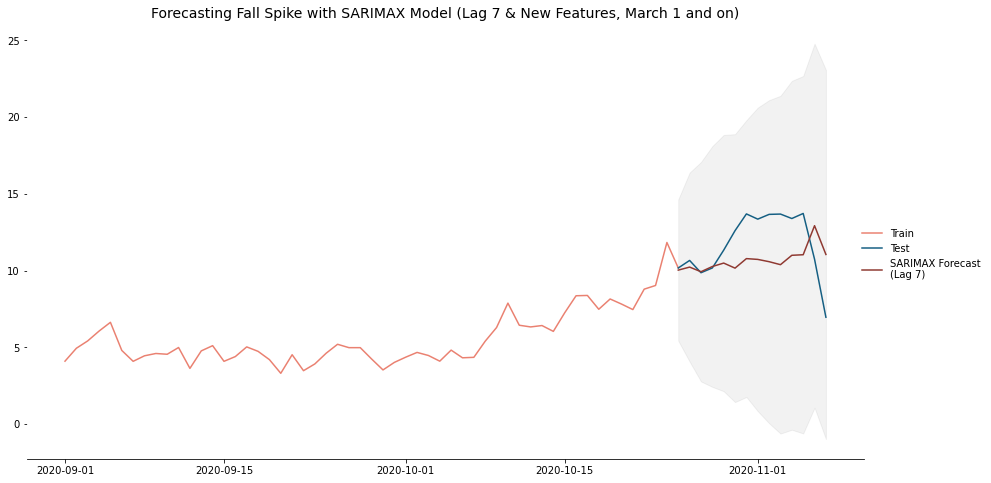

In [300]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 7)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 7 & New Features, March 1 and on)',
                          dist=.85,
                          min=lower_series)

In [301]:
SARIMAX_lag7_metrics_v6 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 7) - March 1', 'rmse': SARIMAX_lag7_metrics_v6['rmse']})
SARIMAX_lag7_metrics_v6

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.16995487270732493,
 'me': -1.0299431208188707,
 'mae': 1.9486261594885919,
 'mpe': -0.054732994728991805,
 'rmse': 2.3458348880713196,
 'acf1': 0.5209953870619323,
 'corr': -0.0037184737098285006,
 'minmax': 0.15196556886675938}

## Starting on 4-1

In [302]:
# SARIMAX Model with 7-day lag and starting on 4-1
sxmodel_16 = pm.auto_arima(train.loc['2020-04-01':], exogenous=testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].loc['2020-04-01':'2020-10-25',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_16.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=637.387, Time=0.89 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=850.136, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=676.132, Time=0.88 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=758.867, Time=0.88 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=871.769, Time=0.19 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=699.091, Time=0.72 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=639.501, Time=1.22 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=639.372, Time=1.76 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=655.490, Time=0.83 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=641.306, Time=1.99 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=657.478, Time=0.85 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=636.484, Time=1.01 sec
 ARIMA(2,0,1)(0,1,0)[7] intercept   : AIC=693.771, Time=0.86 sec
 ARIMA(2,0,1)(1,1,1)[7] intercept   : AIC=642.917, Time=1.18 sec
 ARIMA(2,0,1)(0,1,2)[7] intercept   : AIC=654.7

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  208
Model:             SARIMAX(3, 0, 1)x(0, 1, 1, 7)   Log Likelihood                -305.402
Date:                           Mon, 09 Nov 2020   AIC                            632.803
Time:                                   12:03:38   BIC                            669.140
Sample:                               04-01-2020   HQIC                           647.507
                                    - 10-25-2020                                         
Covariance Type:                             opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
holiday_7       0.4421      1.032      0.429      0.668      -1.580       2.464
tight_res_7     0.7067      3.896      0.181      0.856      -6.930       8.343
loose_res_7    -0.4123      0.440     -0.937      0.349      -1.275       0.450
PRCP_7          0.2043      0.133      1.536      0.124      -0.056       0.465
TAVG_7         -0.0287      0.014     -2.065      0.039      -0.056      -0.001
ar.L1           1.1078      0.122      9.107      0.000       0.869       1.346
ar.L2          -0.2751      0.098     -2.803      0.005      -0.467      -0.083
ar.L3           0.1591      0.110      1.444      0.149      -0.057       0.375
ma.L1          -0.4792      0.147     -3.258      0.001      -0.767      -0.191
ma.S.L7        -0.6933      0.074     -9.317      0.000      -0.839      -0.547
sigma2          1.1900      0.069     17.371      0.000       1.056       1.324
===================================================================================
Ljung-Box (Q):                       38.67   Jarque-Bera (JB):               838.88
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [303]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_16.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


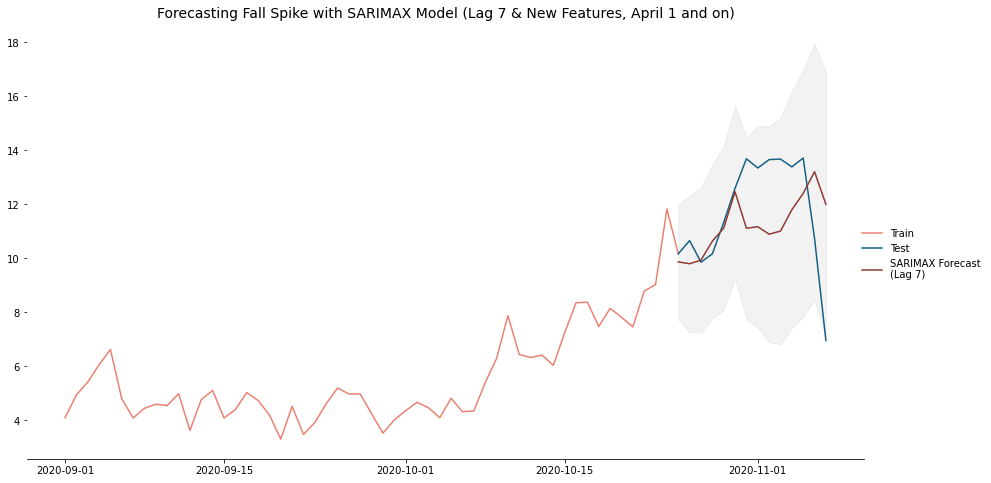

In [304]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 7)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 7 & New Features, April 1 and on)',
                          dist=.85,
                          min=lower_series)

In [305]:
SARIMAX_lag7_metrics_v7 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 7) - April 1', 'rmse': SARIMAX_lag7_metrics_v7['rmse']})
SARIMAX_lag7_metrics_v7

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.15069901846543618,
 'me': -0.4650683056255044,
 'mae': 1.6168694417042546,
 'mpe': -0.00657444146939535,
 'rmse': 2.1212471228785894,
 'acf1': 0.4929248981412842,
 'corr': 0.1586783682273484,
 'minmax': 0.12572206531385777}

## Starting on 5-1

In [307]:
# SARIMAX Model with 7-day lag and starting on 4-1
sxmodel_17 = pm.auto_arima(train.loc['2020-05-01':], exogenous=testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].loc['2020-05-01':'2020-10-25',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_17.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=453.855, Time=0.89 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=697.995, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=489.098, Time=0.72 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=592.333, Time=0.71 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=714.500, Time=0.16 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=485.374, Time=0.60 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=465.346, Time=0.88 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=455.788, Time=1.54 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=459.370, Time=0.77 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=458.229, Time=1.70 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=470.973, Time=0.75 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=462.269, Time=0.98 sec
 ARIMA(1,0,2)(0,1,1)[7] intercept   : AIC=455.873, Time=1.09 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=657.894, Time=0.58 sec
 ARIMA(0,0,2)(0,1,1)[7] intercept   : AIC=576.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  178
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood                -216.927
Date:                           Mon, 09 Nov 2020   AIC                            451.854
Time:                                   12:13:59   BIC                            480.129
Sample:                               05-01-2020   HQIC                           463.327
                                    - 10-25-2020                                         
Covariance Type:                             opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
holiday_7       0.4992      0.498      1.003      0.316      -0.476       1.475
tight_res_7     0.5673      2.144      0.265      0.791      -3.636       4.770
loose_res_7    -0.4238      0.266     -1.595      0.111      -0.944       0.097
PRCP_7          0.1846      0.073      2.516      0.012       0.041       0.328
TAVG_7         -0.0156      0.009     -1.674      0.094      -0.034       0.003
ar.L1           0.9975      0.002    483.195      0.000       0.993       1.002
ma.L1          -0.4732      0.061     -7.817      0.000      -0.592      -0.355
ma.S.L7        -0.5924      0.071     -8.302      0.000      -0.732      -0.453
sigma2          0.7166      0.060     12.002      0.000       0.600       0.834
===================================================================================
Ljung-Box (Q):                       65.49   Jarque-Bera (JB):                42.18
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [308]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_17.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


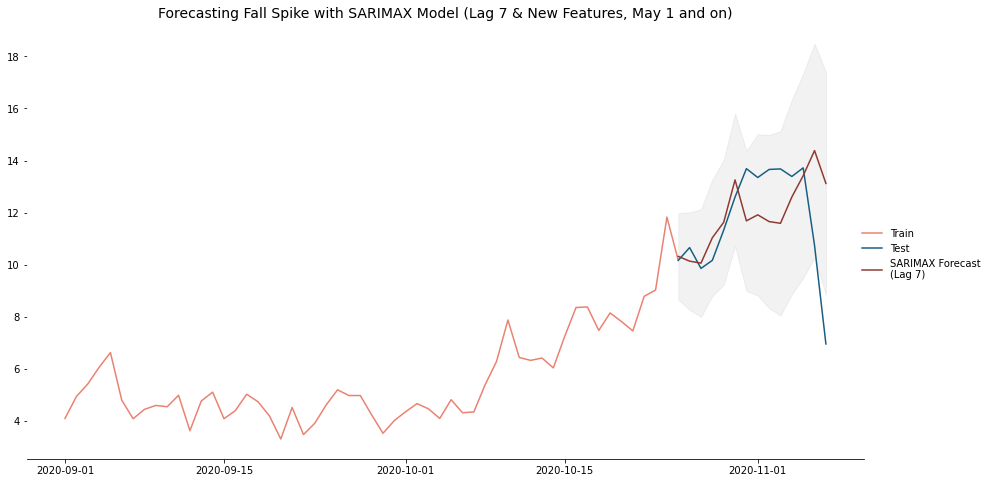

In [309]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 7)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 7 & New Features, May 1 and on)',
                          dist=.85,
                          min=lower_series)

In [310]:
SARIMAX_lag7_metrics_v8 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 7) - May 1', 'rmse': SARIMAX_lag7_metrics_v8['rmse']})
SARIMAX_lag7_metrics_v8

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.15047274608801683,
 'me': 0.20337421751188417,
 'mae': 1.508739592151511,
 'mpe': 0.05295671030528586,
 'rmse': 2.2040588763256803,
 'acf1': 0.4887997246334521,
 'corr': 0.13899736083267533,
 'minmax': 0.11387899129619328}

## Starting on 5-15

In [311]:
# SARIMAX Model with 7-day lag and starting on 4-1
sxmodel_18 = pm.auto_arima(train.loc['2020-05-15':], exogenous=testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].loc['2020-05-15':'2020-10-25',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_18.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=363.919, Time=0.85 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=560.669, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=400.809, Time=0.82 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=490.130, Time=0.76 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=564.456, Time=0.12 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=402.990, Time=0.56 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=365.463, Time=0.97 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=363.103, Time=1.21 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=363.915, Time=1.39 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=485.318, Time=0.94 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=391.965, Time=1.29 sec
 ARIMA(2,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(1,0,2)(0,1,2)[7] intercept   : AIC=365.313, Time=1.40 sec
 ARIMA(0,0,0)(0,1,2)[7] intercept   : AIC=528.951, Time=0.91 sec
 ARIMA(0,0,2)(0,1,2)[7] intercept   : AIC=466.443, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  164
Model:             SARIMAX(1, 0, 1)x(0, 1, [1, 2], 7)   Log Likelihood                -170.525
Date:                                Mon, 09 Nov 2020   AIC                            361.051
Time:                                        12:22:34   BIC                            391.613
Sample:                                    05-15-2020   HQIC                           373.463
                                         - 10-25-2020                                         
Covariance Type:                                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
holiday_7       0.5180      0.343      1.508      0.132      -0.155       1.191
tight_res_7     0.9366      1.029      0.910      0.363      -1.080       2.954
loose_res_7    -0.3212      0.325     -0.987      0.324      -0.959       0.317
PRCP_7          0.2694      0.094      2.851      0.004       0.084       0.455
TAVG_7         -0.0063      0.011     -0.581      0.561      -0.028       0.015
ar.L1           0.9956      0.007    142.393      0.000       0.982       1.009
ma.L1          -0.5516      0.072     -7.679      0.000      -0.692      -0.411
ma.S.L7        -0.6039      0.094     -6.447      0.000      -0.788      -0.420
ma.S.L14        0.2285      0.079      2.886      0.004       0.073       0.384
sigma2          0.4917      0.043     11.303      0.000       0.406       0.577
===================================================================================
Ljung-Box (Q):                       22.43   Jarque-Bera (JB):                29.31
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -0.00
Prob(H) (two-sided):                  0.17   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [312]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_18.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


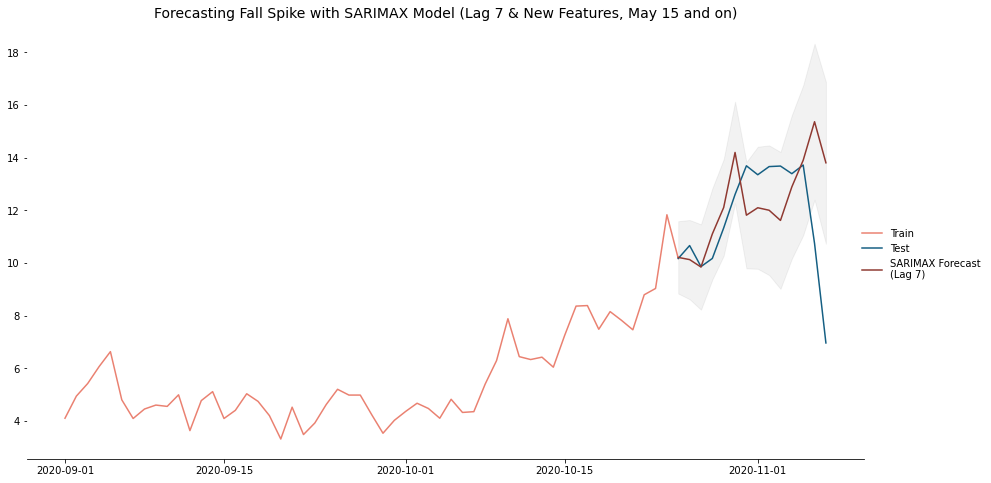

In [313]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 7)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 7 & New Features, May 15 and on)',
                          dist=.85,
                          min=lower_series)

In [314]:
SARIMAX_lag7_metrics_v9 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 7) - May 15', 'rmse': SARIMAX_lag7_metrics_v9['rmse']})
SARIMAX_lag7_metrics_v9

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.16501889389396734,
 'me': 0.5061557619242036,
 'mae': 1.6355832814180231,
 'mpe': 0.08036842210672233,
 'rmse': 2.4628663825959634,
 'acf1': 0.490163288169967,
 'corr': 0.1022600736711426,
 'minmax': 0.11904784027028226}

## Starting on 4-2

In [315]:
# SARIMAX Model with 7-day lag and starting on 4-2
sxmodel_19 = pm.auto_arima(train.loc['2020-04-02':], exogenous=testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].loc['2020-04-02':'2020-10-25',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_19.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=634.240, Time=0.93 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=844.712, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=673.743, Time=0.91 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=754.128, Time=0.85 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=867.324, Time=0.17 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=695.345, Time=0.68 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=636.292, Time=0.95 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=636.253, Time=1.51 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=652.879, Time=0.99 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=638.189, Time=1.92 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=651.586, Time=0.93 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=633.226, Time=1.02 sec
 ARIMA(2,0,1)(0,1,0)[7] intercept   : AIC=688.698, Time=0.68 sec
 ARIMA(2,0,1)(1,1,1)[7] intercept   : AIC=651.013, Time=1.16 sec
 ARIMA(2,0,1)(0,1,2)[7] intercept   : AIC=639.7

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  207
Model:             SARIMAX(3, 0, 1)x(0, 1, 1, 7)   Log Likelihood                -304.039
Date:                           Mon, 09 Nov 2020   AIC                            630.078
Time:                                   12:25:48   BIC                            666.359
Sample:                               04-02-2020   HQIC                           644.760
                                    - 10-25-2020                                         
Covariance Type:                             opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
holiday_7       0.4575      1.062      0.431      0.666      -1.623       2.538
tight_res_7     0.6871      3.860      0.178      0.859      -6.879       8.253
loose_res_7    -0.4085      0.435     -0.940      0.347      -1.260       0.443
PRCP_7          0.2045      0.135      1.516      0.130      -0.060       0.469
TAVG_7         -0.0277      0.014     -1.983      0.047      -0.055      -0.000
ar.L1           1.1072      0.132      8.395      0.000       0.849       1.366
ar.L2          -0.2693      0.105     -2.575      0.010      -0.474      -0.064
ar.L3           0.1541      0.108      1.426      0.154      -0.058       0.366
ma.L1          -0.4665      0.156     -2.982      0.003      -0.773      -0.160
ma.S.L7        -0.7096      0.074     -9.621      0.000      -0.854      -0.565
sigma2          1.1889      0.072     16.609      0.000       1.049       1.329
===================================================================================
Ljung-Box (Q):                       36.61   Jarque-Bera (JB):               772.12
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [316]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_19.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


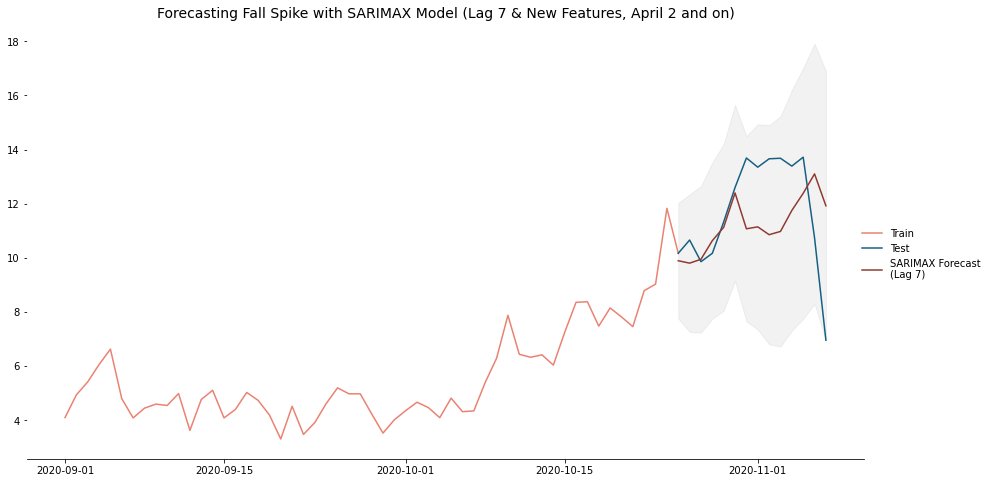

In [317]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 7)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 7 & New Features, April 2 and on)',
                          dist=.85,
                          min=lower_series)

In [318]:
SARIMAX_lag7_metrics_v10 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 7) - April 2', 'rmse': SARIMAX_lag7_metrics_v10['rmse']})
SARIMAX_lag7_metrics_v10

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.1505231922443563,
 'me': -0.4962204290970553,
 'mae': 1.6221381704414053,
 'mpe': -0.009381063721475211,
 'rmse': 2.115487982259776,
 'acf1': 0.4958289312716559,
 'corr': 0.16217709821012508,
 'minmax': 0.1263377984358136}

## Starting on 4-8

In [319]:
# SARIMAX Model with 7-day lag and starting on 4-8
sxmodel_20 = pm.auto_arima(train.loc['2020-04-08':], exogenous=testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].loc['2020-04-08':'2020-10-25',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_20.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=611.127, Time=0.97 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=823.134, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=652.743, Time=0.87 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=733.951, Time=0.66 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=845.338, Time=0.18 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=670.763, Time=0.55 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=613.067, Time=1.04 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=613.132, Time=1.70 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=634.950, Time=0.91 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=615.223, Time=1.92 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=627.713, Time=0.80 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=610.132, Time=0.99 sec
 ARIMA(2,0,1)(0,1,0)[7] intercept   : AIC=665.746, Time=0.60 sec
 ARIMA(2,0,1)(1,1,1)[7] intercept   : AIC=613.812, Time=1.17 sec
 ARIMA(2,0,1)(0,1,2)[7] intercept   : AIC=616.2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  201
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 7)   Log Likelihood                -293.196
Date:                             Mon, 09 Nov 2020   AIC                            606.391
Time:                                     12:30:06   BIC                            639.070
Sample:                                 04-08-2020   HQIC                           619.624
                                      - 10-25-2020                                         
Covariance Type:                               opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
holiday_7       0.4303      0.961      0.448      0.654      -1.453       2.314
tight_res_7     0.7883      4.414      0.179      0.858      -7.863       9.440
loose_res_7    -0.3687      0.432     -0.854      0.393      -1.215       0.477
PRCP_7          0.1849      0.131      1.414      0.157      -0.071       0.441
TAVG_7         -0.0284      0.013     -2.152      0.031      -0.054      -0.003
ar.L1           0.9962      0.004    272.683      0.000       0.989       1.003
ma.L1          -0.3511      0.081     -4.339      0.000      -0.510      -0.193
ma.L2          -0.1535      0.065     -2.368      0.018      -0.281      -0.026
ma.S.L7        -0.7274      0.074     -9.875      0.000      -0.872      -0.583
sigma2          1.1632      0.075     15.597      0.000       1.017       1.309
===================================================================================
Ljung-Box (Q):                       35.47   Jarque-Bera (JB):               899.78
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [320]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_20.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


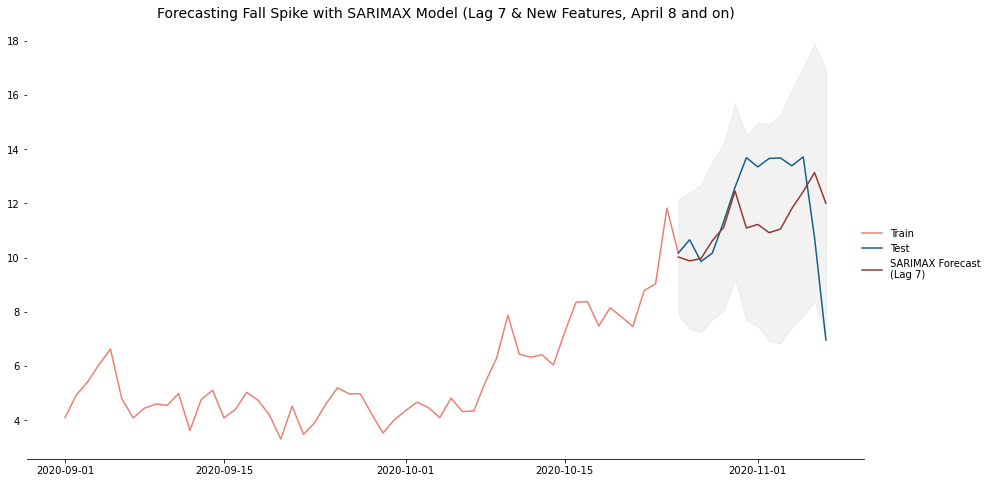

In [321]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 7)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 7 & New Features, April 8 and on)',
                          dist=.85,
                          min=lower_series)

In [322]:
SARIMAX_lag7_metrics_v11 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 7) - April 8', 'rmse': SARIMAX_lag7_metrics_v11['rmse']})
SARIMAX_lag7_metrics_v11

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.1480483494236632,
 'me': -0.4430978787450169,
 'mae': 1.5869616341910329,
 'mpe': -0.004642081364703962,
 'rmse': 2.101758063774232,
 'acf1': 0.4898797132890622,
 'corr': 0.1631574415593284,
 'minmax': 0.12323615412199573}

## Starting on 4-9

In [324]:
# SARIMAX Model with 7-day lag and starting on 4-9
sxmodel_21 = pm.auto_arima(train.loc['2020-04-09':], exogenous=testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].loc['2020-04-09':'2020-10-25',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_21.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=596.570, Time=1.01 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=815.736, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=639.028, Time=0.99 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=729.731, Time=0.92 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=836.918, Time=0.20 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=666.370, Time=0.58 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=597.185, Time=1.11 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=596.744, Time=1.82 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=616.545, Time=1.10 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=598.676, Time=2.09 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=616.092, Time=0.84 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=596.207, Time=1.14 sec
 ARIMA(2,0,1)(0,1,0)[7] intercept   : AIC=661.057, Time=0.64 sec
 ARIMA(2,0,1)(1,1,1)[7] intercept   : AIC=598.849, Time=1.21 sec
 ARIMA(2,0,1)(0,1,2)[7] intercept   : AIC=597.4

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  200
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 7)   Log Likelihood                -286.545
Date:                             Mon, 09 Nov 2020   AIC                            593.091
Time:                                     12:34:07   BIC                            625.718
Sample:                                 04-09-2020   HQIC                           606.304
                                      - 10-25-2020                                         
Covariance Type:                               opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
holiday_7       0.4698      0.879      0.535      0.593      -1.253       2.192
tight_res_7     0.7718      4.057      0.190      0.849      -7.179       8.723
loose_res_7    -0.4142      0.400     -1.036      0.300      -1.198       0.370
PRCP_7          0.2010      0.140      1.438      0.150      -0.073       0.475
TAVG_7         -0.0258      0.012     -2.194      0.028      -0.049      -0.003
ar.L1           0.9949      0.005    201.313      0.000       0.985       1.005
ma.L1          -0.3673      0.079     -4.672      0.000      -0.521      -0.213
ma.L2          -0.1345      0.065     -2.074      0.038      -0.262      -0.007
ma.S.L7        -0.7196      0.066    -10.932      0.000      -0.849      -0.591
sigma2          1.1028      0.075     14.730      0.000       0.956       1.250
===================================================================================
Ljung-Box (Q):                       43.64   Jarque-Bera (JB):               350.99
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [327]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_21.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


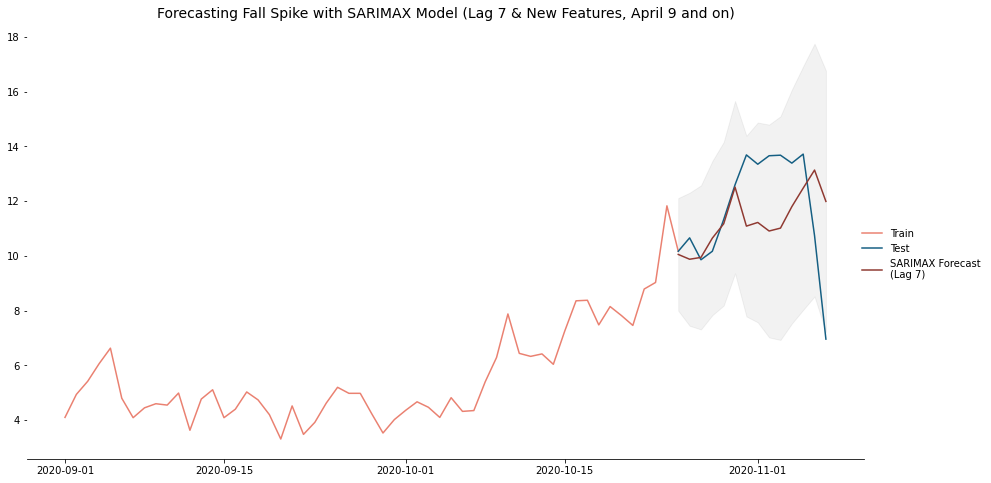

In [328]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 7)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 7 & New Features, April 9 and on)',
                          dist=.85,
                          min=lower_series)

In [329]:
SARIMAX_lag7_metrics_v12 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 7) - April 9', 'rmse': SARIMAX_lag7_metrics_v12['rmse']})
SARIMAX_lag7_metrics_v12

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.14729539001513411,
 'me': -0.4375060973413921,
 'mae': 1.579329601612931,
 'mpe': -0.004174608776126187,
 'rmse': 2.104036977959731,
 'acf1': 0.4927129378404755,
 'corr': 0.16132993812597968,
 'minmax': 0.12256604146388983}

## Trying same model with phases instead

In [333]:
# SARIMAX Model with 7-day lag and starting on 4-9
sxmodel_22 = pm.auto_arima(train.loc['2020-04-09':], exogenous=testing[['holiday_7', 'restrictions', 'PRCP_7', 'TAVG_7']].loc['2020-04-09':'2020-10-25',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_22.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=596.017, Time=0.86 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=808.900, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=639.835, Time=0.66 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=727.926, Time=0.67 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=824.969, Time=0.16 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=666.247, Time=0.35 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=596.776, Time=1.08 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=596.459, Time=1.42 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=618.132, Time=0.70 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=598.443, Time=1.58 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=615.674, Time=0.70 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=595.799, Time=1.00 sec
 ARIMA(2,0,1)(0,1,0)[7] intercept   : AIC=661.413, Time=0.59 sec
 ARIMA(2,0,1)(1,1,1)[7] intercept   : AIC=606.414, Time=1.22 sec
 ARIMA(2,0,1)(0,1,2)[7] intercept   : AIC=596.7

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  200
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 7)   Log Likelihood                -287.321
Date:                             Mon, 09 Nov 2020   AIC                            592.642
Time:                                     12:38:57   BIC                            622.007
Sample:                                 04-09-2020   HQIC                           604.534
                                      - 10-25-2020                                         
Covariance Type:                               opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_7        0.4668      0.895      0.522      0.602      -1.287       2.221
restrictions    -0.0955      0.496     -0.192      0.848      -1.068       0.878
PRCP_7           0.1772      0.137      1.290      0.197      -0.092       0.447
TAVG_7          -0.0253      0.012     -2.160      0.031      -0.048      -0.002
ar.L1            0.9951      0.005    207.155      0.000       0.986       1.005
ma.L1           -0.3656      0.077     -4.764      0.000      -0.516      -0.215
ma.L2           -0.1318      0.065     -2.040      0.041      -0.258      -0.005
ma.S.L7         -0.7310      0.068    -10.805      0.000      -0.864      -0.598
sigma2           1.1119      0.077     14.452      0.000       0.961       1.263
===================================================================================
Ljung-Box (Q):                       43.38   Jarque-Bera (JB):               324.29
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [334]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_22.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_7', 'restrictions', 'PRCP_7', 'TAVG_7']].iloc[-14:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-73-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


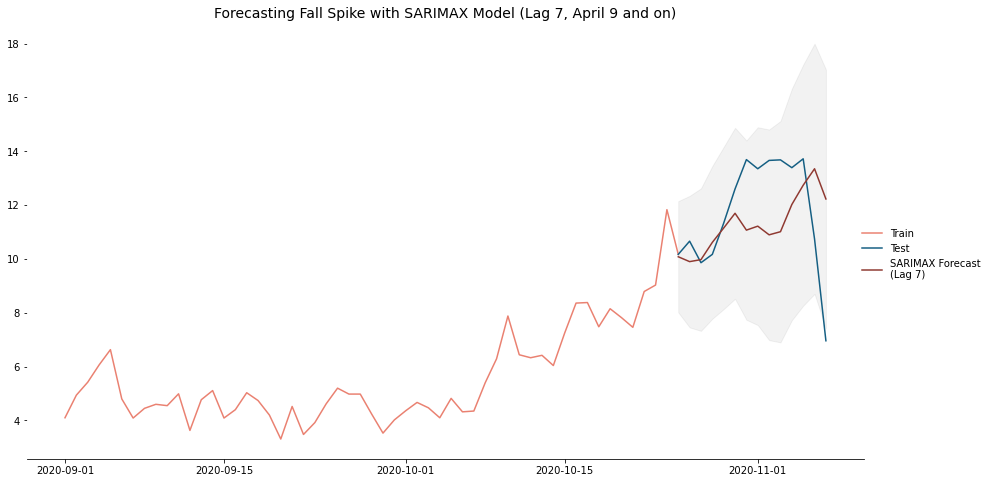

In [335]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 7)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 7, April 9 and on)',
                          dist=.85,
                          min=lower_series)

In [336]:
SARIMAX_lag7_metrics_v13 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 7) - April 9 (phases)', 'rmse': SARIMAX_lag7_metrics_v13['rmse']})
SARIMAX_lag7_metrics_v13

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.15323082650817016,
 'me': -0.4309213122009018,
 'mae': 1.6361403216480854,
 'mpe': -0.0024936825180534145,
 'rmse': 2.1582174307576265,
 'acf1': 0.5191371424762111,
 'corr': 0.11003831721101279,
 'minmax': 0.12641107365538973}

In [337]:
pd.DataFrame(model_comparisons).sort_values(by='rmse')

,model_name,rmse
22,SARIMAX (Lag 7) - April 8,2.101758
23,SARIMAX (Lag 7) - April 9,2.104037
21,SARIMAX (Lag 7) - April 2,2.115488
18,SARIMAX (Lag 7) - April 1,2.121247
6,SARIMAX (Lag 15),2.129283
24,SARIMAX (Lag 7) - April 9 (phases),2.158217
7,SARIMAX (Lag 7),2.198903
19,SARIMAX (Lag 7) - May 1,2.204059
14,SARIMAX (Lag 7) - April 15,2.230688
13,SARIMAX (Lag 15) - April 15,2.262141


### SARIMAX Model with 7-day lag and Training set starting on 4-8 performs best.

In [366]:
weather_forecast = weather.loc[:,['Date', 'PRCP', 'TAVG']]

In [367]:
# Adding weather forecast for the rest of this week
fourteen_day_forecast = [{'Date': '2020-11-08', 'PRCP': 0.00, 'TAVG': 66.0},
                      {'Date': '2020-11-09', 'PRCP': 0.00, 'TAVG': 70.0},
                      {'Date': '2020-11-10', 'PRCP': 0.07, 'TAVG': 54.5},
                      {'Date': '2020-11-11', 'PRCP': 0.00, 'TAVG': 41.0},
                      {'Date': '2020-11-12', 'PRCP': 0.00, 'TAVG': 43.5},
                      {'Date': '2020-11-13', 'PRCP': 0.00, 'TAVG': 42.0},
                      {'Date': '2020-11-14', 'PRCP': 0.05, 'TAVG': 50.0},
                      {'Date': '2020-11-15', 'PRCP': None, 'TAVG': None},
                      {'Date': '2020-11-16', 'PRCP': None, 'TAVG': None},
                      {'Date': '2020-11-17', 'PRCP': None, 'TAVG': None},
                      {'Date': '2020-11-18', 'PRCP': None, 'TAVG': None},
                      {'Date': '2020-11-19', 'PRCP': None, 'TAVG': None},
                      {'Date': '2020-11-20', 'PRCP': None, 'TAVG': None},
                      {'Date': '2020-11-21', 'PRCP': None, 'TAVG': None}]

weather_forecast = weather_forecast.append(pd.DataFrame(fourteen_day_forecast))

In [368]:
# Creating lagged temperature
weather_forecast['TAVG_7'] = weather_forecast.TAVG.shift(7)

# Creating lagged precipitation
weather_forecast['PRCP_7'] = weather_forecast.PRCP.shift(7)


In [370]:
weather_forecast.Date = pd.to_datetime(weather_forecast.Date)
weather_forecast.set_index('Date', inplace=True)
weather_forecast = weather_forecast.loc['2020-03-01':,['TAVG_7', 'PRCP_7']]

In [371]:
holidays_restrictions = testing.loc[:,['holiday_7','tight_res_7','loose_res_7']]
holidays_restrictions.reset_index(inplace=True)

In [372]:
holidays_restrictions.Date = holidays_restrictions.Date.astype(str)

In [373]:
# Adding weather forecast for the rest of this week
holidays_restrictions_dict = [{'Date': '2020-11-08', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-09', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-10', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-11', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-12', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-13', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-14', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-15', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-16', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-17', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-18', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-19', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-20', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-21', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0}]

holidays_restrictions = holidays_restrictions.append(pd.DataFrame(holidays_restrictions_dict))

In [374]:
holidays_restrictions.Date = pd.to_datetime(holidays_restrictions.Date)
holidays_restrictions.set_index('Date', inplace=True)

In [376]:
forecasting_df = pd.merge(holidays_restrictions, weather_forecast, left_index=True, right_index=True)

In [379]:
forecasting_df = forecasting_df.astype(float)

In [382]:
forecasting_df.columns

Index(['holiday_7', 'tight_res_7', 'loose_res_7', 'TAVG_7', 'PRCP_7'], dtype='object')

## Projecting Covid-19 positivity rates for the next 2 weeks (11/8 - 11/21)

In [397]:
# SARIMAX Model with 7-day lag and starting on 4-8
sxmodel_fin = pm.auto_arima(testing.posRate.loc['2020-04-08':], exogenous=forecasting_df.loc['2020-04-08':'2020-11-07',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_fin.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=674.158, Time=1.09 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=897.411, Time=0.29 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=712.012, Time=0.87 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=799.901, Time=0.61 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=912.126, Time=0.12 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=736.001, Time=0.49 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=675.883, Time=1.15 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=675.846, Time=2.01 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=706.843, Time=0.97 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=678.197, Time=2.00 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=678.157, Time=0.77 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=679.203, Time=1.01 sec
 ARIMA(1,0,2)(0,1,1)[7] intercept   : AIC=672.918, Time=0.89 sec
 ARIMA(1,0,2)(0,1,0)[7] intercept   : AIC=731.831, Time=0.55 sec
 ARIMA(1,0,2)(1,1,1)[7] intercept   : AIC=674.3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  214
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 7)   Log Likelihood                -325.553
Date:                             Mon, 09 Nov 2020   AIC                            671.105
Time:                                     15:17:03   BIC                            704.432
Sample:                                 04-08-2020   HQIC                           684.582
                                      - 11-07-2020                                         
Covariance Type:                               opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
holiday_7       0.7698      0.545      1.413      0.158      -0.298       1.838
tight_res_7     0.7588      1.139      0.666      0.505      -1.473       2.991
loose_res_7    -0.3329      0.469     -0.709      0.478      -1.253       0.587
TAVG_7         -0.0304      0.015     -2.031      0.042      -0.060      -0.001
PRCP_7          0.1384      0.145      0.957      0.339      -0.145       0.422
ar.L1           0.9941      0.006    162.224      0.000       0.982       1.006
ma.L1          -0.2322      0.070     -3.323      0.001      -0.369      -0.095
ma.L2          -0.1423      0.081     -1.755      0.079      -0.301       0.017
ma.S.L7        -0.8128      0.062    -13.179      0.000      -0.934      -0.692
sigma2          1.3083      0.090     14.562      0.000       1.132       1.484
===================================================================================
Ljung-Box (Q):                       25.97   Jarque-Bera (JB):               663.78
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [411]:
# Forecasting 14 days out from 11/8 to 11/21
n_periods = 14
fc, confint = sxmodel_fin.predict(n_periods = n_periods, 
                              exogenous = forecasting_df.loc['2020-11-08':,:],
                              return_conf_int=True)
index = forecasting_df.loc['2020-11-08':,:].index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

In [ ]:
# Creating continuous series that connects original posRate series and forecast.
final_series = testing.posRate.append(fc_series)

In [430]:
# Creating series for suggested positivity rate
pos_suggested = pd.Series(5, index=final_series.index)

<ipython-input-446-1a1036f74b7b>:33: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


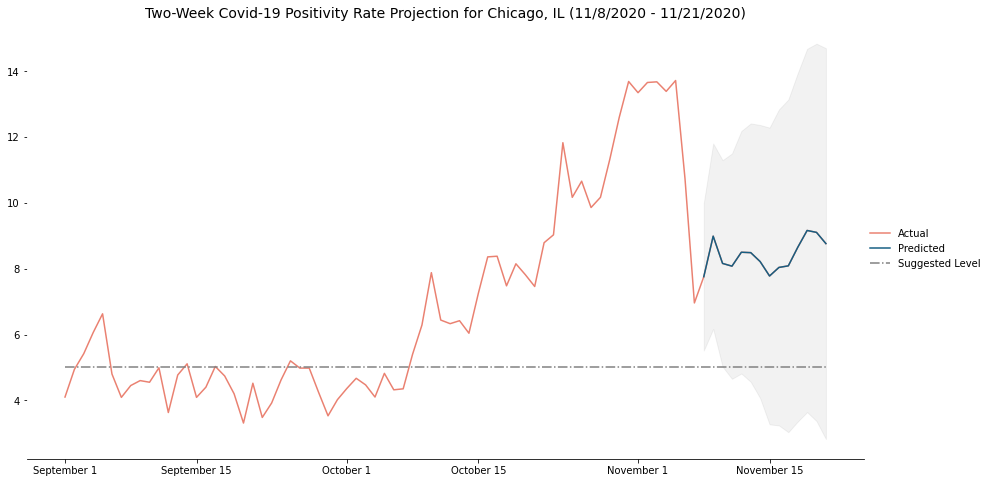

In [446]:
vars_list = [final_series['2020-09-01':], fc_series]
var_labels = ['Actual', 'Predicted', 'Suggested Level']
title = 'Two-Week Covid-19 Positivity Rate Projection for Chicago, IL (11/8/2020 - 11/21/2020)'
dist=.85
min=lower_series


# Plotting code
fig, ax = plt.subplots(figsize=(15,8))
fig.patch.set_facecolor('white')

colors =["#ea8171","#155F83", "#8F3931", "#8A9045", "#D5802B", "#350E20", "#58593F", "#880d1e", '#c8674c',
        '#a2755e']

# Adding unique x-tick labels for specified range
x = ['September 1', 'September 15', 'October 1', 'October 15', 'November 1', 'November 15']

var_handles = []
for i in range(len(vars_list)):
    var_handles.append(ax.plot(vars_list[i], color = colors[i]))

# Adding dotted line for suggested positivity rate level (5-percent)
var_handles.append(ax.plot(pos_suggested['2020-09-01':], color = 'grey', linestyle='-.'))

# Adding confidence interval
ax.fill_between(lower_series.index, 
                 min, 
                 upper_series, 
                 color='k', alpha=.05)

spine_position = ['top', 'left', 'right']
for spine in spine_position:    
    ax.spines[spine].set_color('white')

ax.set_title(title, fontsize=14)
ax.set_xticklabels(x)

ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)
plt.show()